# Demand Analytics Project

### Team members: Bindu Raghu Naga (br28722), Sanjana Nayak, Saiyam Shah

## Background:

Walmart stands as a titan in the retail industry, boasting a sprawling network of hypermarkets that cater to diverse consumer needs. With its extensive reach and customer base, Walmart continuously seeks to optimize its operations and enhance its understanding of market dynamics. In pursuit of this goal, Walmart has compiled a robust dataset encompassing information from 45 of its stores, spanning store attributes and monthly sales data. This dataset serves as a treasure trove of insights, offering a window into the complex interplay of factors that drive sales within the retail environment.

## Problem: 

Within this vast dataset lies a puzzle waiting to be solved: understanding the impact of holidays on store sales. Holidays represent significant events that often spur heightened consumer activity, characterized by increased spending and altered shopping behaviors. However, quantifying the precise influence of holidays on sales remains a challenging task. With four major holidays—Christmas, Thanksgiving, Super Bowl, and Labor Day—embedded in the dataset, Walmart aims to unravel the mysteries surrounding holiday-induced fluctuations in store sales. By doing so, Walmart endeavors to glean actionable insights that can inform strategic decision-making and operational planning.

## Objective:

Against this backdrop, the primary objective of our analysis emerges: to predict weekly store sales and discern the factors driving sales variability. By leveraging the rich dataset provided by Walmart, we seek to uncover patterns and relationships that illuminate the dynamics of retail sales. Specifically, our analysis aims to:

1. Develop predictive models capable of forecasting weekly sales for each store.
2. Explore the impact of temporal factors, such as holidays and seasonal variations, on store sales.
3. Investigate the role of store-specific attributes, such as location, size, and demographics, in shaping sales outcomes.
4. Provide actionable insights to Walmart stakeholders, enabling them to optimize inventory management, marketing strategies, and resource allocation in response to anticipated sales fluctuations.

## Introduction:

In the realm of retail, understanding the drivers behind sales fluctuations is paramount to success. Walmart, a stalwart in the industry, recognizes the importance of dissecting the myriad factors that influence consumer spending patterns. To this end, Walmart has furnished us with a comprehensive dataset encompassing data from 45 of its stores, spanning both store characteristics and monthly sales figures. Within this dataset, lies a tantalizing prospect: the opportunity to unravel the intricate relationship between holidays and store sales.

Holidays hold a special significance in the retail calendar, often serving as catalysts for increased consumer activity. With Christmas, Thanksgiving, Super Bowl, and Labor Day nestled within the dataset, Walmart seeks to shed light on how these occasions impact sales across its stores. Our task is to embark on a journey of exploration, utilizing advanced analytical techniques to decipher the underlying patterns and trends hidden within the data. By doing so, we aim to equip Walmart with the insights needed to navigate the complex landscape of retail sales, empowering them to make informed decisions that drive growth and success.

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from pandas.plotting import autocorrelation_plot as auto_corr
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
import math
from datetime import datetime, timedelta
import itertools
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose as season
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA



ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 98, in read
    data: bytes = self.__fp.read(amt)
                  ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\http\client.py", line 466, in read
    s = self.fp.read(amt)

   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
   - -------------------------------------- 30.7/614.7 kB 48.5 kB/s eta 0:00:13
   - -------------------------------------- 30.7/614.7 kB 48.5 kB/s eta 0:00:13
   - -------------------------------------- 30.7/614.7 kB 48.5 kB/s eta 0:00:13
   - ------------------------------------

ModuleNotFoundError: No module named 'pmdarima'

In [2]:
# Installing additional package
#!pip install pmdarima
from pmdarima.utils import decomposed_plot
from pmdarima.arima import decompose
from pmdarima import auto_arima

# Suppressing warnings
import warnings
warnings.filterwarnings("ignore")


In [6]:
df_store = pd.read_csv('stores.csv') #store data
df_train = pd.read_csv('train.csv') # train set
df_features = pd.read_csv('features.csv') #external information

## Initial Data Exploration and Merging of Three Dataframes

In this phase, we embark on the initial exploration of the data and proceed with the merging of three separate dataframes. This critical step lays the foundation for subsequent analysis and modeling efforts. Through meticulous examination and integration of the data, we aim to create a unified dataset that captures the comprehensive picture of the variables under consideration.

In [7]:
df_store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [8]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [9]:
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [10]:
# merging 3 different sets
df = df_train.merge(df_features, on=['Store', 'Date'], how='inner').merge(df_store, on=['Store'], how='inner')
df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315


In [11]:
df.drop(['IsHoliday_y'], axis=1,inplace=True) # removing duplicated column
df.rename(columns={'IsHoliday_x':'IsHoliday'},inplace=True) # rename the column
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [368]:
df.shape

(421570, 16)

## Analyzing store and department identifiers.








In [369]:
df['Store'].nunique() 

45

In [370]:
df['Dept'].nunique() 

81


This code creates a pivot table named store_dept_table using pandas, where it analyzes weekly sales data across different stores and departments. By pivoting the data on the 'Store' and 'Dept' columns and aggregating the 'Weekly_Sales' values using the mean function, it provides insights into the average weekly sales for each department within each store. This analysis helps in understanding sales patterns, identifying top-performing departments, and making informed decisions related to inventory management, staffing, and promotional strategies at both store and department levels.

In [371]:
store_dept_table = pd.pivot_table(df, index='Store', columns='Dept',
                                  values='Weekly_Sales', aggfunc=np.mean)
display(store_dept_table)

Dept,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,54,55,56,58,59,60,65,67,71,72,74,77,78,79,80,81,82,83,85,87,90,91,92,93,94,95,96,97,98,99
Store,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,22513.322937,46102.090420,13150.478042,36964.154476,24257.941119,4801.780140,24566.487413,35718.257622,28062.052238,31033.386364,24919.270629,10566.545315,38692.880490,15268.550909,24151.061329,9196.557902,7765.304425,1259.018531,4091.571538,7808.450559,8052.076154,21623.184685,6187.389720,10152.336783,6767.997273,1374.649650,593.113986,4651.040210,3415.295035,2408.533287,8202.668392,5946.431189,11530.831678,2535.730909,1476.203566,2800.495105,79978.222587,NaN,58510.409161,1064.769650,7940.326224,NaN,4872.724406,23.995070,19662.989860,-116.454545,917.727920,11437.931259,NaN,32.712727,2355.439371,90.921053,12817.843357,4000.480629,3372.474476,857.775105,1020.995804,NaN,7436.017343,2732.473357,47390.644895,11652.827413,677.000000,11.500000,33974.792937,17139.314615,29780.696573,20727.860909,5704.048951,3685.875524,46006.277203,82427.547832,64238.943427,135458.969510,71699.182378,63180.568182,120772.062168,33251.831639,35207.348811,11827.770769,306.091081
2,30777.980769,65912.922517,17476.563357,45607.666573,30555.315315,6808.382517,40477.837063,58707.369441,34375.864476,38845.854476,23382.686154,7735.946294,46117.959231,21314.132937,27005.179650,13790.854196,11687.563009,4053.439930,5748.619441,9910.939860,12923.013846,29170.616573,8309.564545,15299.508392,9347.725105,1837.954615,798.913217,7111.482657,4981.155385,3884.756993,11755.096713,7488.096993,17595.203497,3875.588601,2631.750559,4500.250769,85114.996014,2.340000,78174.560210,2592.220769,8768.857692,NaN,7245.541189,29.139848,29675.324545,18.068182,1358.347914,15568.465664,NaN,16.226667,4148.373566,104.502868,13060.297692,5545.122308,21610.019091,1391.520559,221.545946,NaN,12125.255594,4634.609371,72929.496643,16986.406014,817.500000,11.764000,32759.096993,26041.273566,31000.484266,24647.232587,5710.719650,3672.042797,24932.985804,97611.537133,80610.380350,164840.230979,70581.977063,70018.672517,143588.751888,34319.063846,40697.204056,14035.400839,475.896905
3,7328.621049,16841.775664,5509.300769,8434.186503,11695.366573,2012.411818,10044.341608,8310.254196,9062.007692,10871.944126,8774.928042,2383.603007,11363.061678,4626.649021,7871.568322,2634.199650,2960.677739,731.313147,1682.199231,1244.529650,3101.769860,10913.330070,2763.627343,4260.447972,2850.050839,500.193636,166.870070,1517.404056,1243.926993,878.475455,4296.111049,3228.155105,4579.719161,1439.325524,622.689371,NaN,108598.364126,NaN,18203.108252,646.832028,4422.944406,NaN,2133.657762,9.922500,6179.259510,38.875000,NaN,17.581481,NaN,5.411803,961.390210,58.311239,7153.737902,1606.808881,NaN,244.878455,138.125874,NaN,2021.482657,1101.610000,22796.856573,3374.960769,424.000000,6.000000,7230.372448,24.420476,1429.300070,6746.578392,19.330000,874.128182,939.435455,1540.049161,318.685594,7568.280210,NaN,656.294444,15745.528252,3934.540000,343.437357,30.570833,NaN
4,36979.940070,93639.315385,19012.491678,56603.400140,45668.406783,8241.777692,50728.151399,62949.723776,34437.170979,37269.667413,27145.836643,8141.910979,69596.447343,28567.509441,21270.153007,15815.878042,13146.543790,3038.317762,8888.302867,8865.273147,17289.916294,46234.012867,10875.301189,15640.748531,18429.759930,2579.906154,916.232238,9472.121189,7683.686783,3813.243986,13685.430350,12304.056224,25142.675385,4376.574755,3005.231469,3640.752727,80093.946084,1.560000,78729.263077,975.417622,9511.818531,NaN,5441.563566,13.696939,39128.896154,23.536154,2324.615532,6911.676643,NaN,8.200000,3721.521329,131.887000,18662.627203,6040.540839,6078.142308,1586.446993,410.795105,NaN,12471.426713,7686.018741,101244.450839,20627.307762,344.571429,5.375000,52436.656923,19379.101399,31055.285315,29371.320979,9161.217343,2730.060000,14223.462308,8


Store numbers range from 1 to 45, while department numbers span from 1 to 99, although some numbers are absent, such as 88 or 89. The total number of departments is 81.

Upon examining the pivot table, it becomes apparent that erroneous values exist, including instances of 0 and negative values for weekly sales. Given the nature of sales transactions, it is implausible for sales amounts to be negative. Moreover, it is highly unlikely for a department to have no sales throughout an entire week. Therefore, it is imperative to rectify these inaccurate values..

Now, we are filtering the DataFrame to select rows where the weekly sales values are less than or equal to zero. This is important because negative or zero sales values are typically not plausible in real-world sales data. By identifying these instances, we can investigate the reasons behind such anomalies and take appropriate actions, such as removing or correcting the erroneous data points to ensure the accuracy and reliability of our analysis.

In [372]:
df.loc[df['Weekly_Sales']<=0]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
846,1,6,2012-08-10,-139.65,False,85.05,3.494,11436.22,245.0,6.85,6964.26,4836.22,221.958433,6.908,A,151315
2384,1,18,2012-05-04,-1.27,False,75.55,3.749,21290.13,NaN,69.89,4977.35,3261.04,221.671800,7.143,A,151315
6048,1,47,2010-02-19,-863.00,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
6049,1,47,2010-03-12,-698.00,False,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,A,151315
6051,1,47,2010-10-08,-58.00,False,63.93,2.633,NaN,NaN,NaN,NaN,NaN,211.746754,7.838,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419597,45,80,2010-02-12,-0.43,True,27.73,2.773,NaN,NaN,NaN,NaN,NaN,181.982317,8.992,B,118221
419598,45,80,2010-02-19,-0.27,False,31.27,2.745,NaN,NaN,NaN,NaN,NaN,182.034782,8.992,B,118221
419603,45,80,2010-04-16,-1.61,False,54.28,2.899,NaN,NaN,NaN,NaN,NaN,181.692477,8.899,B,118221
419614,45,80,2010-07-02,-0.27,False,76.61,2.815,NaN,NaN,NaN,NaN,NaN,182.318780,8.743,B,118221


Among the 421,570 rows in the dataset, approximately 1,358 rows have weekly sales values that are either zero or negative, accounting for around 0.3% of the total data. Considering this small proportion, one approach is to remove or ignore these rows containing incorrect sales values. This action is reasonable because erroneous sales data can skew analysis results and hinder the accuracy of insights drawn from the dataset. By excluding these problematic rows, we can enhance the reliability of our analysis and ensure that our conclusions are based on accurate and representative data.

In [373]:
df = df.loc[df['Weekly_Sales'] > 0]

In [374]:
df.shape 

(420212, 16)

# Date

This code snippet extracts the first five and last five dates from the 'Date' column of the DataFrame and then concatenates them into a single DataFrame named 'result'. It then prints the combined result.

The 'head(5)' function is used to select the first five rows of the 'Date' column, while 'tail(5)' selects the last five rows. These functions are commonly used in pandas to retrieve subsets of data from the beginning or end of a DataFrame.

After concatenating the first and last five dates using 'pd.concat()', the resulting DataFrame 'result' contains a series of dates ranging from February 5th, 2010, to October 26th, 2012.

In [375]:
first_five = df['Date'].head(5)
last_five = df['Date'].tail(5)

result = pd.concat([first_five, last_five])
print(result)

0         2010-02-05
1         2010-02-12
2         2010-02-19
3         2010-02-26
4         2010-03-05
421565    2012-09-28
421566    2012-10-05
421567    2012-10-12
421568    2012-10-19
421569    2012-10-26
Name: Date, dtype: object


### IsHoliday column - In retail datasets, this column is often included to provide information about sales patterns during holiday periods, as consumer behavior and purchasing habits can significantly vary during these times.

Including this column in a dataset allows analysts and data scientists to segment and analyze sales data based on holiday and non-holiday periods. This segmentation can help identify trends, seasonal patterns, and the impact of holidays on sales performance. It can also inform strategic decision-making related to inventory management, marketing campaigns, and staffing during peak holiday seasons.

<Axes: xlabel='IsHoliday', ylabel='Weekly_Sales'>

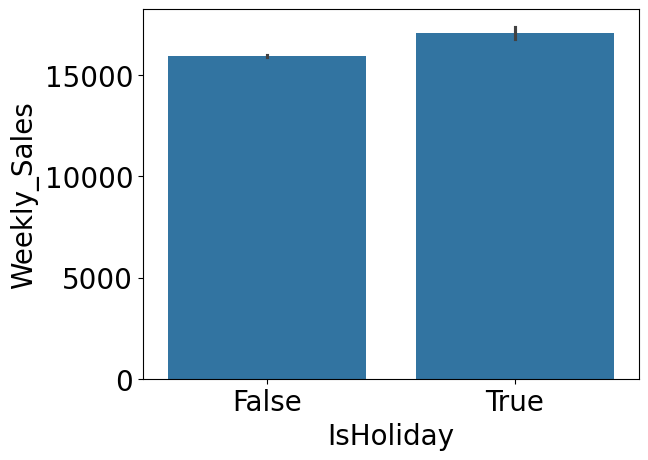

In [376]:
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=df)

This plot allows for a visual comparison of weekly sales between holiday and non-holiday periods, providing insights into how sales may vary based on the presence or absence of holidays. It helps to identify any significant differences in sales performance during holiday periods compared to regular weeks.

In [377]:
df_holiday = df.loc[df['IsHoliday']==True]
df_holiday['Date'].unique() 

array(['2010-02-12', '2010-09-10', '2010-11-26', '2010-12-31',
       '2011-02-11', '2011-09-09', '2011-11-25', '2011-12-30',
       '2012-02-10', '2012-09-07'], dtype=object)

In [378]:
df_not_holiday = df.loc[df['IsHoliday']==False]
df_not_holiday['Date'].nunique() 

133


1. **Seasonal Sales Planning**: Recognizing the dates of major holidays such as Super Bowl (12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13), Labor Day (10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13), Thanksgiving (26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13), and Christmas (31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13) allows the business to strategically plan for seasonal fluctuations in consumer demand. By analyzing historical sales data and trends from previous holiday periods, the company can forecast sales expectations and adjust inventory levels, marketing strategies, and staffing resources accordingly to capitalize on peak sales opportunities during these holidays.

2. **Promotional Campaigns**: Understanding the timing of key holidays enables the company to plan and execute targeted promotional campaigns and sales events to coincide with peak consumer spending periods. For example, the business can launch special promotions, discounts, and marketing campaigns leading up to holidays like Super Bowl and Labor Day to attract customers and drive sales both in-store and online.

3. **Product Assortment**: Analyzing sales performance and customer preferences during holidays provides valuable insights for optimizing product assortment and inventory management strategies. By identifying top-selling products and popular categories during specific holidays, the company can tailor its product mix and ensure it stocks the right items to meet customer demand and maximize sales potential.

4. **Customer Engagement**: Holidays present opportunities for the company to enhance customer engagement and create memorable shopping experiences. By leveraging the festive atmosphere of holidays like Thanksgiving and Christmas, the business can create engaging in-store displays, themed decorations, and curated product collections to inspire customer excitement and drive sales. Additionally, offering personalized recommendations, gift guides, and exclusive holiday deals can help enhance the overall shopping experience and foster customer loyalty.

5. **Supply Chain Optimization**: Anticipating increased demand and logistical challenges during peak holiday periods allows the company to optimize its supply chain and logistics operations. By collaborating closely with suppliers, distributors, and transportation partners, the business can ensure timely delivery of goods, minimize stockouts, and mitigate potential disruptions to supply chain operations, thereby ensuring seamless shopping experiences for customers during the busy holiday season.

By integrating insights from both historical holiday sales data and the provided holiday dates, the company can develop comprehensive strategies to maximize sales opportunities, drive revenue growth, and deliver exceptional customer experiences during key holiday periods throughout the year.

In [379]:
# Identify Super Bowl dates in the training set
df.loc[(df['Date'] == '2010-02-12')|(df['Date'] == '2011-02-11')|(df['Date'] == '2012-02-10'),'Super_Bowl'] = True
df.loc[(df['Date'] != '2010-02-12')&(df['Date'] != '2011-02-11')&(df['Date'] != '2012-02-10'),'Super_Bowl'] = False

# Identify Labor Day dates in the training set
df.loc[(df['Date'] == '2010-09-10')|(df['Date'] == '2011-09-09')|(df['Date'] == '2012-09-07'),'Labor_Day'] = True
df.loc[(df['Date'] != '2010-09-10')&(df['Date'] != '2011-09-09')&(df['Date'] != '2012-09-07'),'Labor_Day'] = False

# Identify Thanksgiving dates in the training set
df.loc[(df['Date'] == '2010-11-26')|(df['Date'] == '2011-11-25'),'Thanksgiving'] = True
df.loc[(df['Date'] != '2010-11-26')&(df['Date'] != '2011-11-25'),'Thanksgiving'] = False

# Identify Christmas dates in the training set
df.loc[(df['Date'] == '2010-12-31')|(df['Date'] == '2011-12-30'),'Christmas'] = True
df.loc[(df['Date'] != '2010-12-31')&(df['Date'] != '2011-12-30'),'Christmas'] = False


These columns can be used to segment the data based on holiday periods, allowing for more granular insights into sales performance, customer behavior, and other relevant metrics during specific holiday seasons. Additionally, these columns can serve as features in predictive models to account for the impact of holidays on the target variable, such as weekly sales. Overall, the code enables the integration of holiday-related information into the analysis pipeline, enhancing the understanding and interpretation of the dataset.








<Axes: xlabel='Christmas', ylabel='Weekly_Sales'>

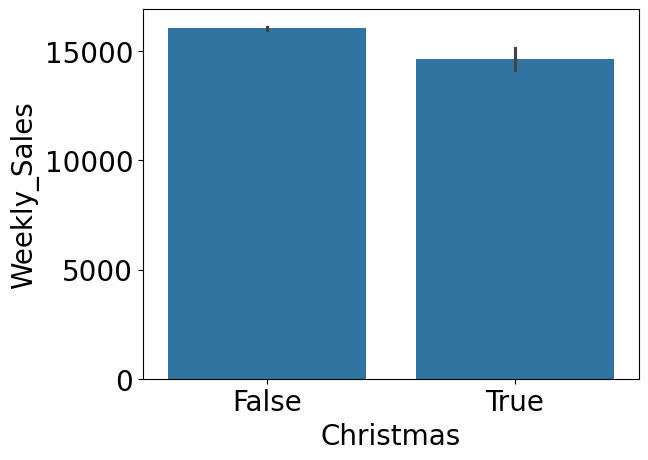

In [380]:
sns.barplot(x='Christmas', y='Weekly_Sales', data=df) # Christmas holiday vs not-Christmas

This plot allows for a visual comparison of weekly sales between Christmas and non-Christmas periods, providing insights into how sales may vary during the holiday season compared to regular weeks. It helps to identify any significant differences in sales performance between these two periods and assess the impact of Christmas on overall sales.








<Axes: xlabel='Thanksgiving', ylabel='Weekly_Sales'>

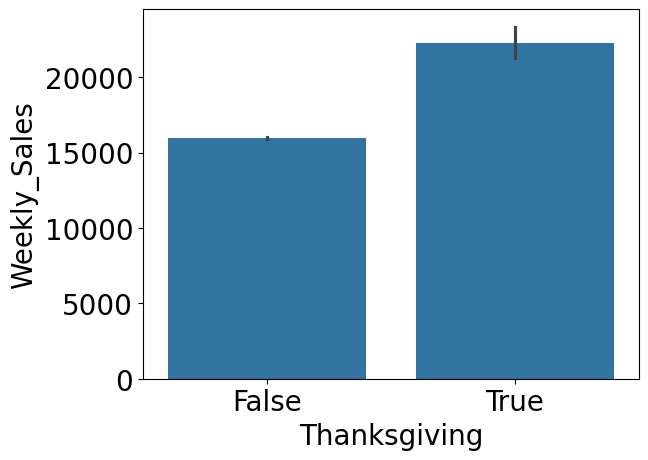

In [381]:
#similarly for Thanksgiving holiday vs not-thanksgiving
sns.barplot(x='Thanksgiving', y='Weekly_Sales', data=df) 

<Axes: xlabel='Super_Bowl', ylabel='Weekly_Sales'>

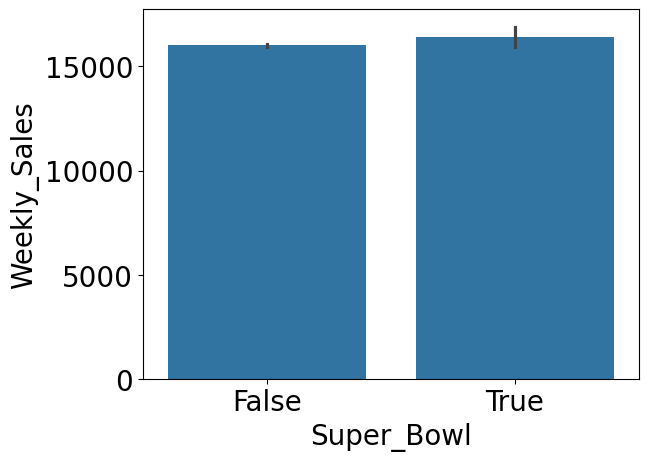

In [382]:
# similarly for Super bowl holiday vs not-super bowl
sns.barplot(x='Super_Bowl', y='Weekly_Sales', data=df) 

<Axes: xlabel='Labor_Day', ylabel='Weekly_Sales'>

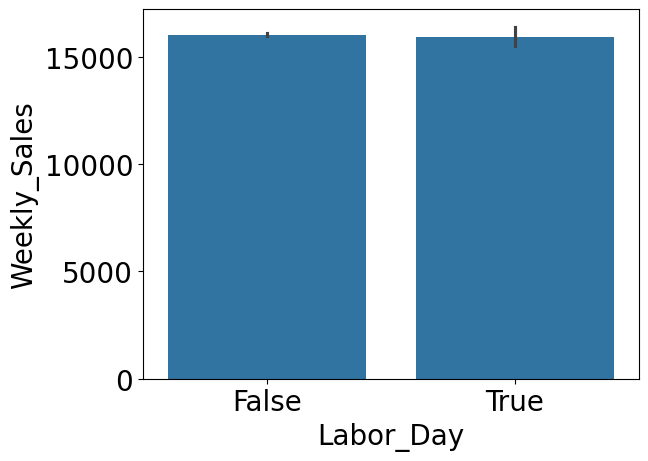

In [383]:
# similarly for Labor day holiday vs not-labor day
sns.barplot(x='Labor_Day', y='Weekly_Sales', data=df) 



1. **Labor Day and Christmas**:
   - The bar plots for Labor Day and Christmas show that there isn't a significant increase in the average weekly sales during these holidays compared to non-holiday weeks.
   - **Insight**: This suggests that Labor Day and Christmas may not have a substantial impact on consumer spending behavior in this particular context. It's possible that customers might not perceive these holidays as major shopping events or opportunities for significant retail spending.
   - **Business Implications**: For businesses, this insight indicates that allocating substantial resources towards promotional activities or marketing campaigns specifically tied to Labor Day or Christmas may not yield substantial returns. Instead, focusing on other peak shopping periods or optimizing sales strategies for different holidays could be more effective in driving revenue growth.

2. **Super Bowl**:
   - The bar plot for Super Bowl reveals a positive effect on sales, albeit not as pronounced as Thanksgiving.
   - **Insight**: This suggests that while Super Bowl may stimulate some increase in consumer spending, it might not be as impactful as other major holidays.
   - **Business Implications**: Businesses could capitalize on the increased consumer interest around Super Bowl by offering targeted promotions or themed marketing campaigns leading up to the event. However, it's essential to recognize that the uplift in sales during Super Bowl may be moderate compared to other peak holiday periods.

3. **Thanksgiving**:
   - The bar plot for Thanksgiving shows the highest difference in average weekly sales compared to non-holiday weeks.
   - **Insight**: This significant increase in sales during Thanksgiving week indicates a strong consumer response, potentially driven by factors such as Black Friday sales events and the anticipation of holiday shopping.
   - **Business Implications**: Thanksgiving presents a prime opportunity for businesses to maximize sales by leveraging the heightened consumer interest and spending during this period. Strategies such as offering exclusive deals, extended hours, and promoting doorbuster sales can help capitalize on the surge in demand and drive revenue growth.

4. **Insight into Christmas Sales Behavior**:
   - The observation that Christmas week does not show a substantial increase in average weekly sales suggests a specific pattern in consumer behavior.
   - **Insight**: People may prefer to purchase Christmas gifts 1-2 weeks before Christmas rather than during the actual holiday week. Additionally, the presence of Black Friday sales during the Thanksgiving week may influence consumer spending behavior, diverting some of the holiday shopping activity away from the immediate Christmas period.
   - **Business Implications**: Understanding this pattern in Christmas sales behavior can inform strategic decisions around inventory management, promotional timing, and marketing efforts. Businesses can adjust their sales strategies to cater to the preferences and shopping habits of their customers, such as offering early holiday promotions or extending sales beyond Christmas week to capture pre-holiday shopping demand more effectively.

Overall, the analysis of holiday-related sales patterns provides valuable insights for businesses to optimize their sales strategies, allocate resources effectively, and capitalize on peak shopping periods to drive revenue growth and enhance customer satisfaction.

# Type Effect on Holidays

 Impact of different store types (A, B, and C) on sales performance during holiday periods. 
 Each store type (A, B, and C) represents a distinct category of stores within the dataset, likely differentiated by factors such as size, location, target demographic, product assortment, and pricing strategy.

In [384]:
df.groupby(['Christmas','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for types on Christmas 

Christmas  Type
False      A       20174.350209
           B       12301.986116
           C        9570.951973
True       A       18310.167535
           B       11488.988057
           C        8031.520607
Name: Weekly_Sales, dtype: float64

This code performs a groupby operation on the DataFrame `df`, grouping the data by two variables: `'Christmas'` (indicating whether it's Christmas week or not) and `'Type'` (store types A, B, and C). It then calculates the average weekly sales for each combination of Christmas and store type.

For each combination of Christmas status (`True` or `False`) and store type (A, B, or C), the code calculates the average weekly sales.

- For non-Christmas weeks:
  - Store type A has an average weekly sales of approximately $20,174.35.
    
  - Store type B has an average weekly sales of approximately $12,301.99.
    
  - Store type C has an average weekly sales of approximately $9,570.95.

- For Christmas weeks:
  - Store type A has an average weekly sales of approximately $18,310.17.
    
  - Store type B has an average weekly sales of approximately $11,488.99.
    
  - Store type C has an average weekly sales of approximately $8,031.52.

**Insights**:

1. **Impact of Christmas on Sales**: Across all store types, there is a decrease in average weekly sales during Christmas weeks compared to non-Christmas weeks. This suggests that while holiday-related sales may increase, the overall impact on weekly sales is not as significant as during non-holiday periods.

2. **Variation Across Store Types**: Store type A consistently has the highest average weekly sales, followed by type B and then type C, regardless of whether it's Christmas week or not. This indicates that store type A generally performs better in terms of sales compared to the other store types.

3. **Relative Performance During Holidays**: Despite the decrease in average weekly sales during Christmas weeks for all store types, the relative performance order remains consistent. Store type A still outperforms type B and type C in terms of average weekly sales during both Christmas and non-Christmas weeks.



In [385]:
df.groupby(['Labor_Day','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for types on Labor Day

Labor_Day  Type
False      A       20151.210941
           B       12294.954138
           C        9542.098293
True       A       20004.267422
           B       12084.304642
           C        9893.459258
Name: Weekly_Sales, dtype: float64


For each combination of Labor Day status (`True` or `False`) and store type (A, B, or C), the code calculates the average weekly sales.

- For non-Labor Day weeks:
  - Store type A has an average weekly sales of approximately $20,151.21.
 
  - Store type B has an average weekly sales of approximately $12,294.95.
 
  - Store type C has an average weekly sales of approximately $9,542.10.

- For Labor Day weeks:
  - Store type A has an average weekly sales of approximately $20,004.27.
    
  - Store type B has an average weekly sales of approximately $12,084.30.
    
  - Store type C has an average weekly sales of approximately $9,893.46.

**Insights**:

1. **Impact of Labor Day on Sales**: Across all store types, there is little to no change in average weekly sales during Labor Day weeks compared to non-Labor Day weeks. This suggests that Labor Day may not have a substantial impact on overall sales performance across store types.

2. **Consistency Across Store Types**: The average weekly sales figures for each store type remain relatively consistent between Labor Day weeks and non-Labor Day weeks. There are minor fluctuations, but the overall patterns remain similar.

3. **Similar Performance Across Store Types**: Store types A, B, and C exhibit similar average weekly sales figures during both Labor Day weeks and non-Labor Day weeks. There are no significant differences in performance among the different store types during this period.



In [386]:
df.groupby(['Thanksgiving','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for types on Thanksgiving

Thanksgiving  Type
False         A       20044.007801
              B       12197.717405
              C        9547.377807
True          A       27397.776346
              B       18733.973971
              C        9696.566616
Name: Weekly_Sales, dtype: float64


For each combination of Thanksgiving status (`True` or `False`) and store type (A, B, or C), the code calculates the average weekly sales.

- For non-Thanksgiving weeks:
  - Store type A has an average weekly sales of approximately $20,044.01.
    
  - Store type B has an average weekly sales of approximately $12,197.72.
    
  - Store type C has an average weekly sales of approximately $9,547.38.

- For Thanksgiving weeks:
  - Store type A has an average weekly sales of approximately $27,397.78.
    
  - Store type B has an average weekly sales of approximately $18,733.97.
    
  - Store type C has an average weekly sales of approximately $9,696.57.

**Insights**:

1. **Significant Impact of Thanksgiving on Sales**: Across all store types, there is a substantial increase in average weekly sales during Thanksgiving weeks compared to non-Thanksgiving weeks. This suggests that Thanksgiving has a significant impact on overall sales performance across store types.

2. **Varying Magnitude of Impact Across Store Types**: While all store types experience an increase in average weekly sales during Thanksgiving weeks, the magnitude of this increase varies among the store types. Store type A experiences the highest increase in average weekly sales during Thanksgiving weeks, followed by type B and then type C.

3. **Differences in Performance Across Store Types**: Store type A consistently outperforms types B and C in terms of average weekly sales, both during Thanksgiving weeks and non-Thanksgiving weeks. However, the gap in performance between store types may widen during Thanksgiving weeks due to the higher increase in sales experienced by type A.



In [387]:
df.groupby(['Super_Bowl','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for types on Super Bowl

Super_Bowl  Type
False       A       20138.055908
            B       12286.739293
            C        9536.110508
True        A       20612.757674
            B       12467.035506
            C       10179.271884
Name: Weekly_Sales, dtype: float64


For each combination of Super Bowl status (`True` or `False`) and store type (A, B, or C), the code calculates the average weekly sales.

- For non-Super Bowl weeks:
  - Store type A has an average weekly sales of approximately $20,138.06.
    
  - Store type B has an average weekly sales of approximately $12,286.74.
    
  - Store type C has an average weekly sales of approximately $9,536.11.

- For Super Bowl weeks:
  - Store type A has an average weekly sales of approximately $20,612.76.
    
  - Store type B has an average weekly sales of approximately $12,467.04.
    
  - Store type C has an average weekly sales of approximately $10,179.27.

**Insights**:

1. **Limited Impact of Super Bowl on Sales**: Across all store types, there is a slight increase in average weekly sales during Super Bowl weeks compared to non-Super Bowl weeks. However, this increase is relatively modest compared to other major holidays.

2. **Consistency Across Store Types**: The average weekly sales figures for each store type remain relatively consistent between Super Bowl weeks and non-Super Bowl weeks. There are minor fluctuations, but the overall patterns remain similar.

3. **Similar Performance Across Store Types**: Store types A, B, and C exhibit similar average weekly sales figures during both Super Bowl weeks and non-Super Bowl weeks. There are no significant differences in performance among the different store types during this period.



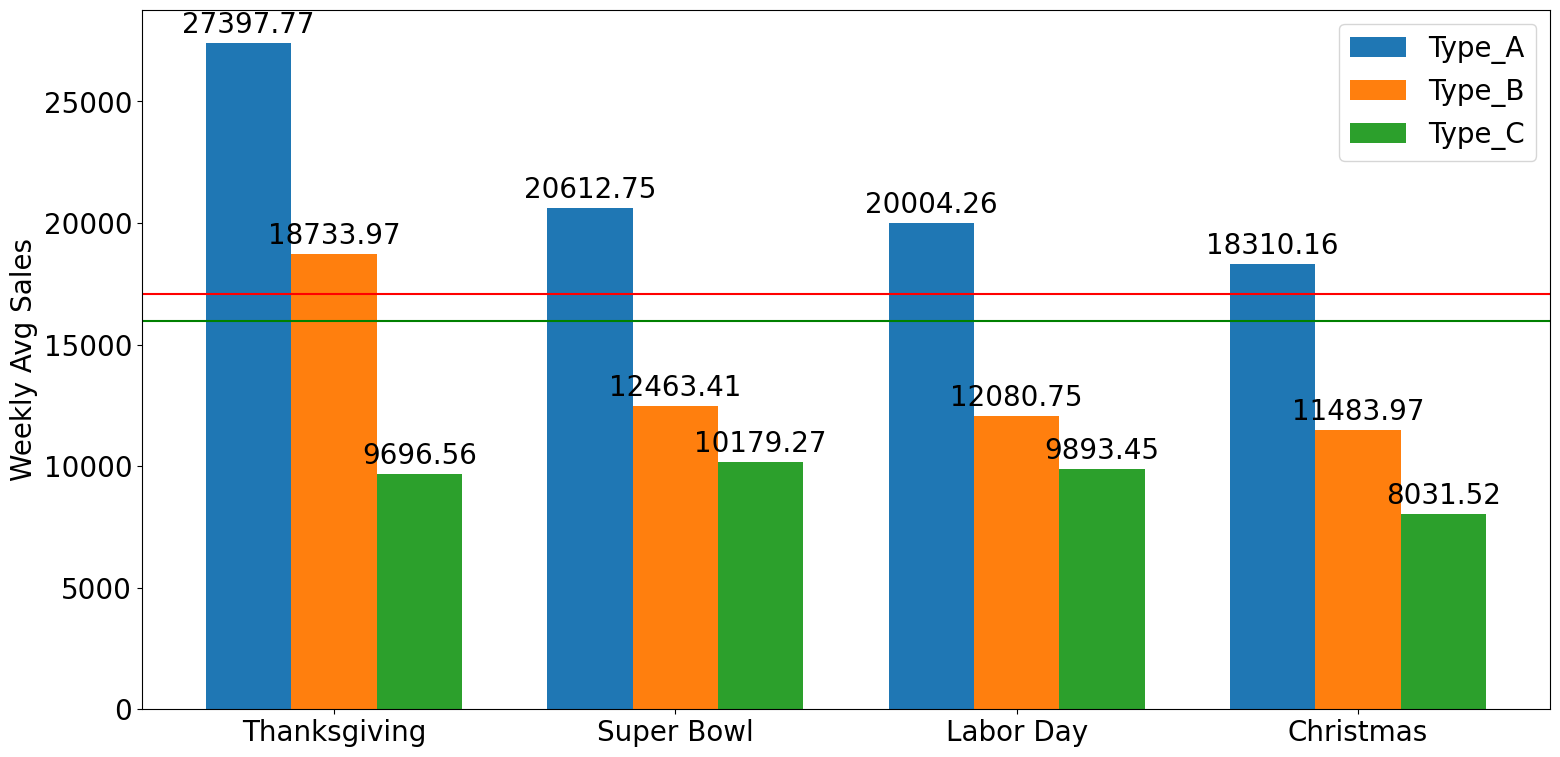

In [388]:


# Labels for the holidays
labels = ['Thanksgiving', 'Super Bowl', 'Labor Day', 'Christmas']

# Average weekly sales for each store type during the holidays
A_means = [27397.77, 20612.75, 20004.26, 18310.16]
B_means = [18733.97, 12463.41, 12080.75, 11483.97]
C_means = [9696.56, 10179.27, 9893.45, 8031.52]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 8))

# Plotting the bar charts for each store type
rects1 = ax.bar(x - width, A_means, width, label='Type_A')
rects2 = ax.bar(x, B_means, width, label='Type_B')
rects3 = ax.bar(x + width, C_means, width, label='Type_C')

# Add labels and legend
ax.set_ylabel('Weekly Avg Sales')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Function to add labels on top of each bar
def autolabel(rects):
    """Attach a text label above each bar, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Adding labels on top of each bar
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

# Adding horizontal lines for average sales during holidays and non-holidays
plt.axhline(y=17094.30, color='r', label='Holidays Avg')
plt.axhline(y=15952.82, color='green', label='Non-Holidays Avg')

fig.tight_layout()

plt.show()


The statement highlights key observations derived from the graph generated by the provided code:

1. **Highest Sales Average during Thanksgiving Week**: The graph illustrates that among the selected holidays, the highest average weekly sales occur during the Thanksgiving week. This indicates that Thanksgiving has the most significant impact on driving sales compared to other holidays such as Super Bowl, Labor Day, and Christmas.

2. **Type A Stores Lead in Sales Across All Holidays**: Regardless of the holiday, Type A stores consistently demonstrate the highest average weekly sales. This suggests that Type A stores have a stronger performance in terms of sales compared to Type B and Type C stores during holiday periods. The consistent dominance of Type A stores across all holidays underscores their effectiveness in attracting customers and generating sales during these peak shopping periods.

Overall, these insights provide valuable information for retailers to understand the sales dynamics during different holidays and the performance of different store types. This understanding can inform strategic decisions related to inventory management, marketing strategies, and resource allocation to maximize sales and profitability during holiday seasons.

In [389]:
df.sort_values(by='Weekly_Sales',ascending=False).head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas
95373,10,72,2010-11-26,693099.36,True,55.33,3.162,NaN,NaN,NaN,NaN,NaN,126.669267,9.003,B,126512,False,False,True,False
338013,35,72,2011-11-25,649770.18,True,47.88,3.492,1333.24,NaN,58563.24,20.97,6386.86,140.421786,8.745,B,103681,False,False,True,False
95425,10,72,2011-11-25,630999.19,True,60.68,3.760,174.72,329.0,141630.61,79.00,1009.98,129.836400,7.874,B,126512,False,False,True,False
337961,35,72,2010-11-26,627962.93,True,46.67,3.039,NaN,NaN,NaN,NaN,NaN,136.689571,8.763,B,103681,False,False,True,False
135665,14,72,2010-11-26,474330.10,True,46.15,3.039,NaN,NaN,NaN,NaN,NaN,182.783277,8.724,A,200898,False,False,True,False


The top 5 highest weekly sales entries all correspond to Thanksgiving weeks, indicating a consistent trend where Thanksgiving weeks tend to generate exceptionally high sales figures. This observation aligns with the expectation that Thanksgiving is a significant holiday period associated with increased consumer spending

In [390]:
df_store.groupby('Type').describe()['Size'].round(2) 

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
A,22.0,177247.73,49392.62,39690.0,155840.75,202406.0,203819.0,219622.0
B,17.0,101190.71,32371.14,34875.0,93188.00,114533.0,123737.0,140167.0
C,6.0,40541.67,1304.15,39690.0,39745.00,39910.0,40774.0,42988.0


The provided code performs a groupby operation on the DataFrame `df_store`, grouping the data by the 'Type' column, which represents different types of stores (A, B, and C). It then calculates descriptive statistics for the 'Size' column within each group.


**Insights**:
- **Store Type A**: 
  - The average size of Type A stores is approximately 177,247.73 square units.
  - Type A stores have the widest range of sizes, ranging from 39,690 to 219,622 square units.
- **Store Type B**: 
  - The average size of Type B stores is approximately 101,190.71 square units.
  - Type B stores have a narrower range of sizes compared to Type A, ranging from 34,875 to 140,167 square units.
- **Store Type C**: 
  - The average size of Type C stores is approximately 40,541.67 square units.
  - Type C stores have the smallest range of sizes among the three types, ranging from 39,690 to 42,988 square units.

These statistics provide valuable insights into the distribution of store sizes across different store types, which can be useful for various strategic planning and decision-making processes within the retail business.

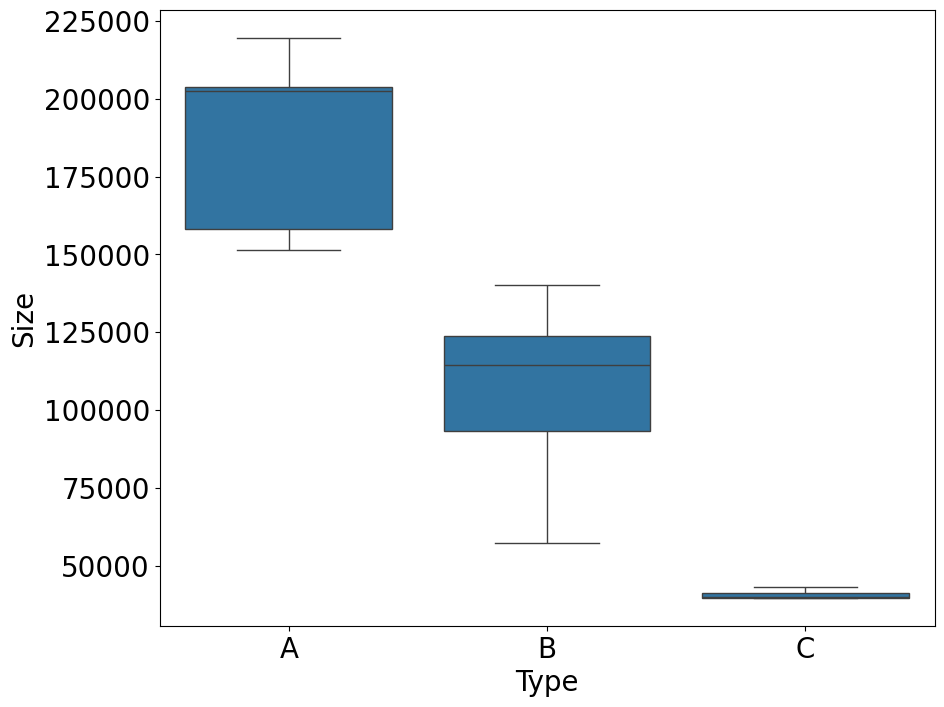

In [391]:

# Create a figure to visualize the relationship between store types and sizes
plt.figure(figsize=(10, 8))

# Plot a boxplot to examine the distribution of sizes across different store types
fig = sns.boxplot(x='Type', y='Size', data=df, showfliers=False)



The boxplot represents the distribution of store sizes categorized by their types (A, B, and C).
The x-axis displays the store types (Type A, Type B, and Type C).
The y-axis represents the sizes of the stores.


The explanation clarifies the relationship between store size and sales, as observed from the data:

1. **Consistency between Store Size and Sales**: The sizes of stores align with their sales figures, which is expected. Generally, larger stores tend to generate higher sales revenue compared to smaller ones. This relationship is evident from the data, indicating that the size of a store influences its sales performance.

2. **Classification of Stores by Size**: Walmart categorizes its stores based on their sizes, and this classification is reflected in the observed data. The graph likely displays a trend where larger store sizes correspond to higher sales volumes. Specifically:
   - Type A stores, which typically represent Walmart's largest stores, have the highest average sales among the three types.
   - Type B stores, which are generally smaller than Type A but larger than Type C, exhibit intermediate sales figures.
   - Type C stores, the smallest in size among the three types, tend to have comparatively lower sales figures.

3. **Transition Points between Store Types**: The graph likely illustrates distinct transition points between the different types of stores based on their sizes. Specifically:
   - After the smallest size value of Type A stores, the sizes of Type B stores begin.
   - Similarly, after the smallest size value of Type B stores, the sizes of Type C stores commence.
   
In summary, the observed pattern in the data confirms the intuitive expectation that larger stores generally yield higher sales, and Walmart's classification of stores according to size corresponds well with their respective sales performances.

In [392]:
df.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270031
MarkDown2       309308
MarkDown3       283561
MarkDown4       285694
MarkDown5       269283
CPI                  0
Unemployment         0
Type                 0
Size                 0
Super_Bowl           0
Labor_Day            0
Thanksgiving         0
Christmas            0
dtype: int64


1. **Purpose of Markdowns**: Walmart implements markdowns as a pricing strategy to stimulate sales and manage inventory. Markdowns are typically represented as numerical values in the dataset, indicating the extent of price reductions or promotional offers applied to products.

2. **Presence of NaN Values**: The presence of NaN values in the markdown columns suggests that no markdown was applied on those specific dates or for those particular products. However, these NaN values might not be ideal for analysis or modeling purposes, as they can lead to inconsistencies or inaccuracies in calculations involving markdowns.

3. **Replacing NaN with 0**: By replacing the NaN values with 0, you effectively signify that no markdown was implemented on those dates or for those products. This simplifies the dataset and facilitates more straightforward analysis, as 0 represents the absence of markdown, while non-zero values indicate the extent of markdown applied.

4. **Interpretation**: With this approach, you can interpret the data more reliably. If a row contains a 0 in the markdown column, it indicates that no markdown was applied on that date. Conversely, if a row contains a non-zero value, it signifies the presence of a markdown and provides information about the extent of the markdown.

Overall, replacing NaN values with 0 in the markdown columns allows for clearer interpretation of the data and enables more effective analysis of the impact of markdowns on sales performance.

In [393]:
df = df.fillna(0)

In [394]:
df.isna().sum() # last null check

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Super_Bowl      0
Labor_Day       0
Thanksgiving    0
Christmas       0
dtype: int64

In [395]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000
mean,22.195611,44.241309,16033.114591,60.090599,3.360890,2590.323565,878.905242,468.845949,1083.534361,1662.805002,171.212496,7.960000,136749.732787
std,12.787236,30.508819,22729.492116,18.447857,0.458519,6053.415601,5076.928566,5534.069859,3896.068938,4206.209357,39.162445,1.863879,60993.084568
min,1.000000,1.000000,0.010000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2120.130000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7661.700000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.350989,7.866000,140167.000000
75%,33.000000,74.000000,20271.265000,74.280000,3.738000,2809.050000,2.400000,4.540000,425.290000,2168.040000,212.445487,8.567000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


The summary statistics provide insights into various aspects of the dataset:

1. **Store and Department Statistics**:
   - There are 45 unique stores and 99 unique departments in the dataset.
   - Weekly sales data is provided for each store-department combination.

2. **Weekly Sales Distribution**:
   - The mean weekly sales across all store-department combinations is approximately $15,981.
     
   - Weekly sales vary widely, with a standard deviation of approximately $22,711.
     
   - The minimum weekly sales value is $0.01, indicating some extremely low sales instances.
   - The maximum weekly sales value is $693099.36, demonstrating significant variation in sales performance across store-department combinations.

3. **Environmental Factors**:
   - Temperature ranges from -2.06°F to 100.14°F, with a mean temperature of approximately 60.09°F.
     
   - Fuel prices range from $2.472 to $4.468 per gallon, with a mean price of approximately $3.36 per gallon.
     
   - Consumer Price Index (CPI) ranges from 126.064 to 227.233, with a mean CPI of approximately 171.20.
     
   - Unemployment rate ranges from 3.879% to 14.313%, with a mean rate of approximately 7.96%.

4. **Markdowns**:
   - Markdowns (MarkDown1 to MarkDown5) vary widely in magnitude, with considerable standard deviations.
   - The maximum values of markdowns indicate significant promotional activity, especially for MarkDown4 and MarkDown5.

5. **Store Size**:
   - Store sizes range from 34,875 to 219,622 square feet, with a mean size of approximately 136,728 square feet.

Regarding the minimum weekly sales value of $0.01, we've chosen not to change them at this stage due to the extensive nature of the dataset, involving numerous departments across multiple stores. Instead, we plan to use averages for Exploratory Data Analysis (EDA) to gain insights without the need for extensive manual checks, which would be time-consuming given the dataset's size and complexity. This approach allows for efficient analysis while acknowledging the limitations of the dataset.

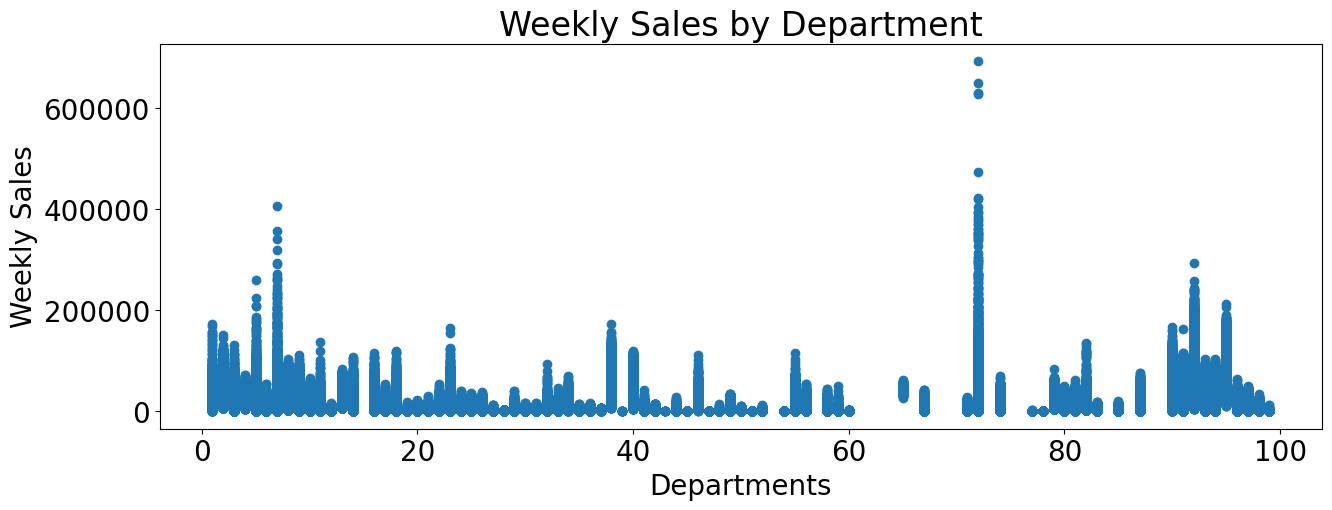

In [396]:
x = df['Dept']
y = df['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Department')
plt.xlabel('Departments')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

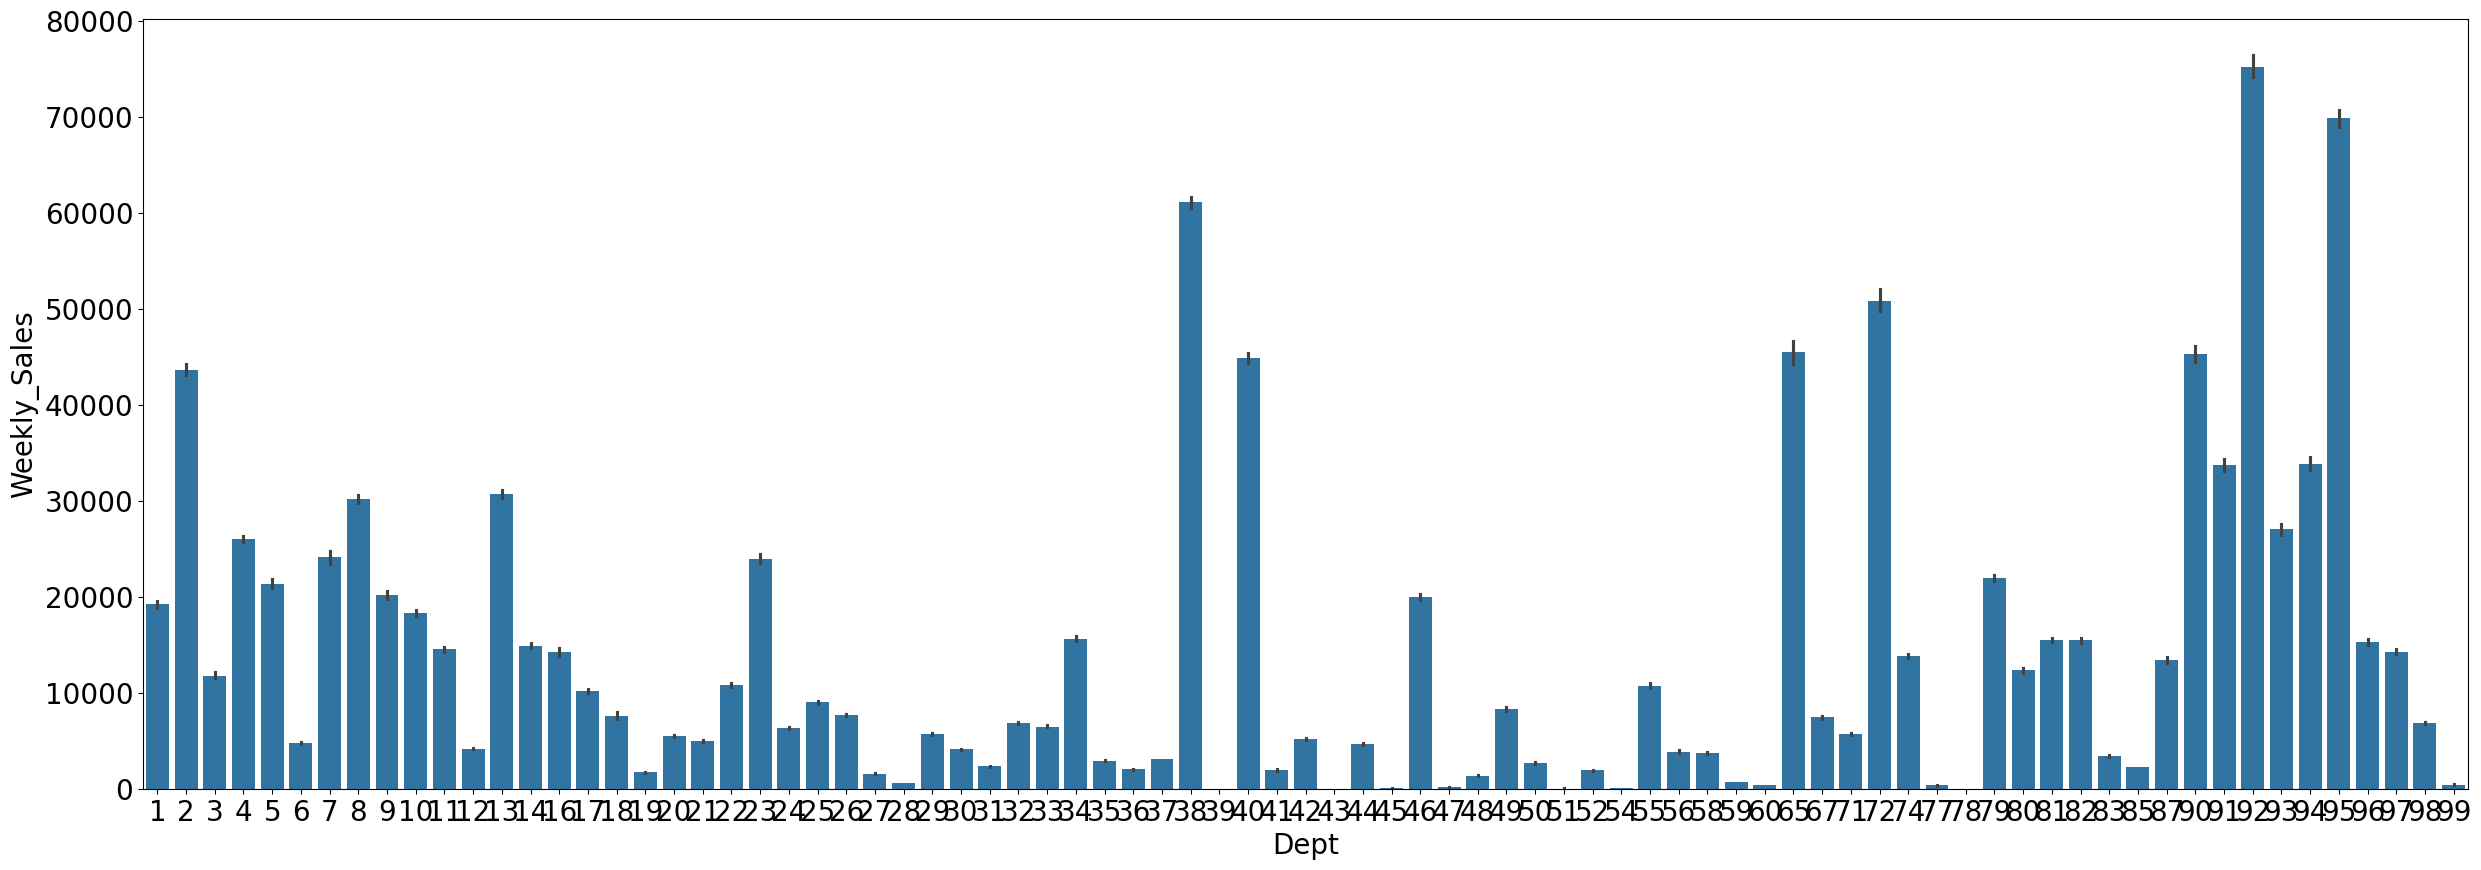

In [397]:
plt.figure(figsize=(30,10))
fig = sns.barplot(x='Dept', y='Weekly_Sales', data=df)

The discrepancy between the initial observation and the average sales values suggests interesting dynamics within the dataset:

1. **Initial Observation**:
   - The first graph indicates that a specific department, likely department 72, consistently exhibits higher sales values, particularly within the range of 60-80.

2. **Average Sales Analysis**:
   - Despite the initial observation, the analysis of average sales reveals that department 92 has higher mean sales overall.

3. **Interpretation**:
   - The discrepancy could be attributed to seasonal variations or periodic spikes in sales for department 72. Seasonal departments often experience fluctuations in sales depending on the time of year or specific events.
   - Department 92, on the other hand, might have a more stable and consistently higher level of sales throughout the year, leading to a higher average.

4. **Seasonal Department Dynamics**:
   - Department 72's higher sales values during certain seasons suggest that it may specialize in products or categories that experience increased demand during specific times of the year, such as holidays or seasonal trends.
   - These seasonal spikes in sales can lead to higher observed values for department 72 within certain periods, despite department 92 having higher average sales overall.

5. **Business Implications**:
   - Understanding the seasonal dynamics of different departments is crucial for effective inventory management, staffing, and promotional strategies.
   - While department 72 may require more attention and resources during peak seasons to capitalize on increased demand, department 92's consistent performance highlights its importance as a steady revenue generator throughout the year.
   - Walmart can leverage these insights to optimize assortment planning, allocate resources effectively, and tailor marketing efforts to maximize sales and profitability across all departments.

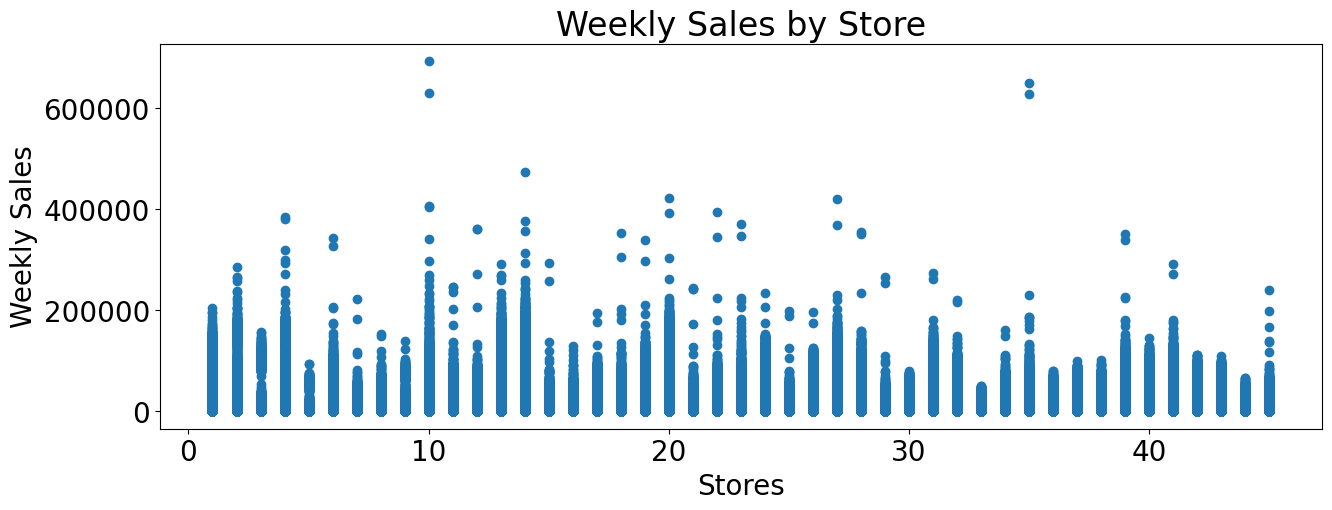

In [398]:
x = df['Store']
y = df['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Store')
plt.xlabel('Stores')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

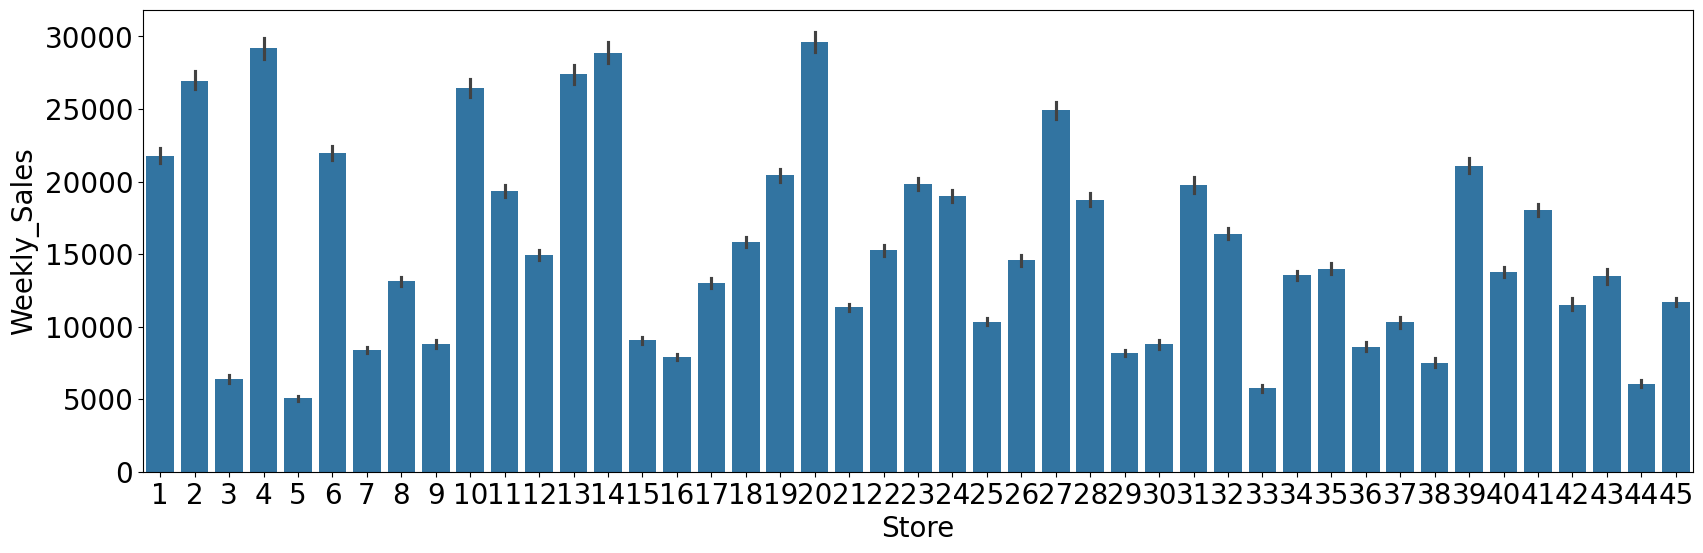

In [399]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='Store', y='Weekly_Sales', data=df)

The discrepancy between the initial observation and the average sales values for stores indicates intriguing dynamics within the dataset:

1. **Initial Observation**:
   - The initial graph suggests that certain stores exhibit higher sales values compared to others, potentially indicating strong performance or specific factors contributing to their sales success.

2. **Average Sales Analysis**:
   - Despite the initial observation, the analysis of average sales reveals that store 20 consistently ranks as the best performer, with stores 4 and 14 following closely behind.

3. **Interpretation**:
   - The discrepancy could be due to various factors such as store size, location, demographics of the surrounding area, marketing strategies, and operational efficiency.
   - Stores with higher observed sales values in the initial graph may have experienced periodic spikes in sales due to factors like promotions, seasonal demand, or special events, leading to a skewed perception of their overall performance.
   - In contrast, store 20's consistent ranking as the top performer in terms of average sales suggests that it maintains a high level of sales across different periods, indicating sustained success and possibly effective management practices.

4. **Business Implications**:
   - Understanding the underlying factors contributing to the observed sales patterns for each store is crucial for strategic decision-making.
   - Walmart can analyze the performance drivers of store 20 and identify best practices that contribute to its success. These insights can then be applied to other stores to improve overall performance.
   - While stores with occasional spikes in sales may indicate opportunities for maximizing revenue during specific periods, focusing on consistent performers like store 20 can ensure stable and reliable revenue streams over the long term.
   - By leveraging insights from both initial observations and average sales analysis, Walmart can optimize resource allocation, inventory management, and marketing strategies to enhance performance across all stores and drive sustained growth and profitability.

In [400]:
df["Date"] = pd.to_datetime(df["Date"]) 
df['week'] = df['Date'].dt.isocalendar().week
df['month'] = df['Date'].dt.month 
df['year'] = df['Date'].dt.year


In [401]:
df.groupby('month')['Weekly_Sales'].mean() # to see the best months for sales

month
1     14182.239153
2     16048.701191
3     15464.817698
4     15696.435193
5     15845.556200
6     16397.605478
7     15905.472425
8     16113.800069
9     15147.216063
10    15279.182119
11    17534.964277
12    19425.798603
Name: Weekly_Sales, dtype: float64

The average weekly sales for each month provide insights into the sales performance throughout the year:
**Insights:**
1. **Seasonal Trends**:
   - The sales peak in December, indicating high consumer spending during the holiday season, particularly around Christmas.
   - November also sees a significant increase in sales, likely driven by Black Friday and Thanksgiving holiday promotions.
   - Summer months (June-August) generally exhibit higher sales compared to other periods, possibly due to factors like vacations, outdoor activities, and back-to-school shopping.
  
2. **Low Points**:
   - September tends to have lower sales compared to other months, possibly reflecting a post-summer slowdown as consumers transition away from vacation spending.
   - January and February, immediately following the holiday season, also show relatively lower sales figures as consumer spending typically decreases after the holidays.

3. **Implications**:
   - Understanding these seasonal sales patterns can inform inventory management, marketing strategies, and promotional activities.
   - Walmart can capitalize on peak sales months by optimizing product assortments, launching targeted promotions, and enhancing customer engagement during these periods.
   - During slower months, Walmart can implement strategies to stimulate sales, such as offering special promotions, introducing new products, or focusing on customer retention initiatives.

By leveraging insights from monthly sales data, Walmart can strategically plan and allocate resources to maximize sales opportunities throughout the year and drive overall business growth.

In [402]:
df.groupby('year')['Weekly_Sales'].mean() # to see the best years for sales

year
2010    16318.648285
2011    16007.797985
2012    15748.265005
Name: Weekly_Sales, dtype: float64

Analyzing the average weekly sales by year provides valuable insights into the overall sales performance over the three-year period:

- **2010**: $16,318.65
- **2011**: $16,007.80
- **2012**: $15,748.27

**Insights:**
1. **Consistent Performance**:
   - Across the three years, there is a relatively stable average weekly sales trend, with minor fluctuations from year to year.
   - Despite slight variations, the average sales remain within a similar range, indicating a consistent level of consumer demand and overall business performance over the observed period.

2. **Implications**:
   - The consistent performance across the years suggests that Walmart has maintained a steady sales trajectory, which could be attributed to effective operational strategies, strong brand presence, and customer loyalty.
   - While there may be fluctuations in external factors such as economic conditions or competitive landscape, Walmart's ability to sustain consistent sales performance reflects its resilience and adaptability in navigating market dynamics.
   - Understanding the underlying factors contributing to this stable sales performance can help Walmart identify key success factors and areas for improvement, allowing for strategic adjustments to further enhance sales growth and profitability.

By analyzing sales performance over multiple years, Walmart can gain valuable insights into long-term trends and make informed decisions to drive sustainable business success.

<Axes: xlabel='month'>

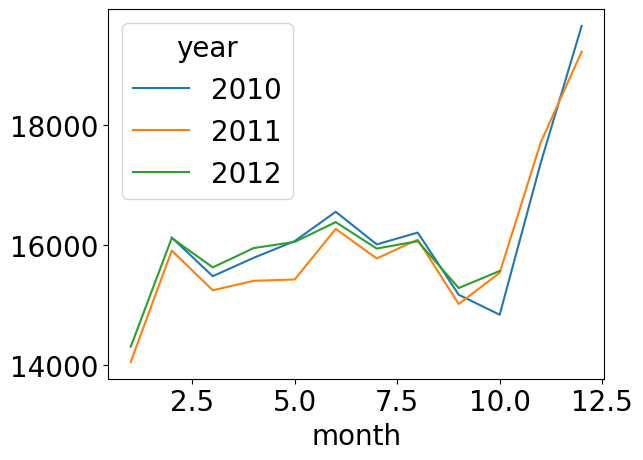

In [403]:
monthly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "month")
monthly_sales.plot()

The code provided creates a pivot table to visualize the monthly sales trends across different years. Here's an explanation of the insights derived from the graph:

- **Insights:**
  - The graph depicts the trend of weekly sales over the months for each year.
  - Notably, there appears to be a decline in sales during certain months in 2011 compared to 2010, as indicated by lower peaks in the sales curve.
  - When examining the mean sales values, it's evident that 2010 generally had higher sales figures compared to 2011.
  - However, the data for 2012 only extends up to October, with no information available for November and December, which are typically high-sales months due to holiday shopping seasons.
  - Despite the absence of sales data for the last two months of 2012, the mean sales for the available months are comparable to those of 2010, indicating a potentially strong performance for the full year if the data for November and December were included.

- **Implications:**
  - The lower sales observed in 2011 could be attributed to various factors such as economic conditions, consumer behavior shifts, or internal business dynamics.
  - The absence of sales data for November and December 2012 limits a comprehensive comparison with previous years. However, based on the available data, 2012 shows promising sales performance, suggesting the potential for surpassing 2010's sales figures if data for the entire year were available.
  - Obtaining sales data for November and December 2012 and incorporating it into the analysis would provide a more accurate assessment of 2012's sales performance and its comparison to previous years.

By considering these insights, Walmart can gain a better understanding of the monthly sales trends across different years, enabling them to make informed decisions to optimize sales strategies and drive growth.

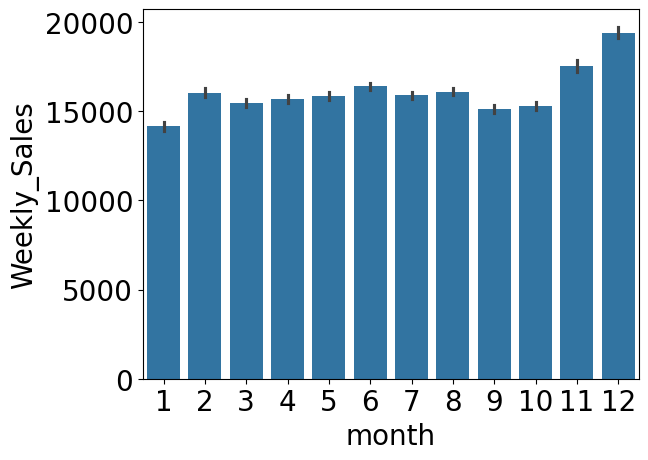

In [404]:
fig = sns.barplot(x='month', y='Weekly_Sales', data=df)

The graph above illustrates the sales trends across different months, indicating that December and November consistently yield the highest sales, aligning with expectations for holiday shopping seasons. While Thanksgiving holidays show peak sales values, averaging the sales data reveals that December generally outperforms other months in terms of sales figures. This insight suggests that while Thanksgiving may witness spikes in sales due to specific promotional events or shopping occasions, the cumulative sales over the entire month of December tend to be higher on average.

In [405]:
df.groupby('week')['Weekly_Sales'].mean().sort_values(ascending=False).head()

week
51    26454.164116
47    22269.601768
50    20478.421134
49    18731.794840
22    16856.650245
Name: Weekly_Sales, dtype: float64

The top 5 sales averages by week indicate that the highest weekly sales occur approximately 1-2 weeks before significant events such as Christmas, Thanksgiving, and Black Friday. Additionally, there is a notable spike in sales at the end of May, likely coinciding with the closure of schools for summer break. These trends suggest that consumers tend to engage in heightened purchasing activity leading up to major holidays and seasonal transitions, potentially driven by promotional offers, increased consumer spending, and the anticipation of upcoming festivities.

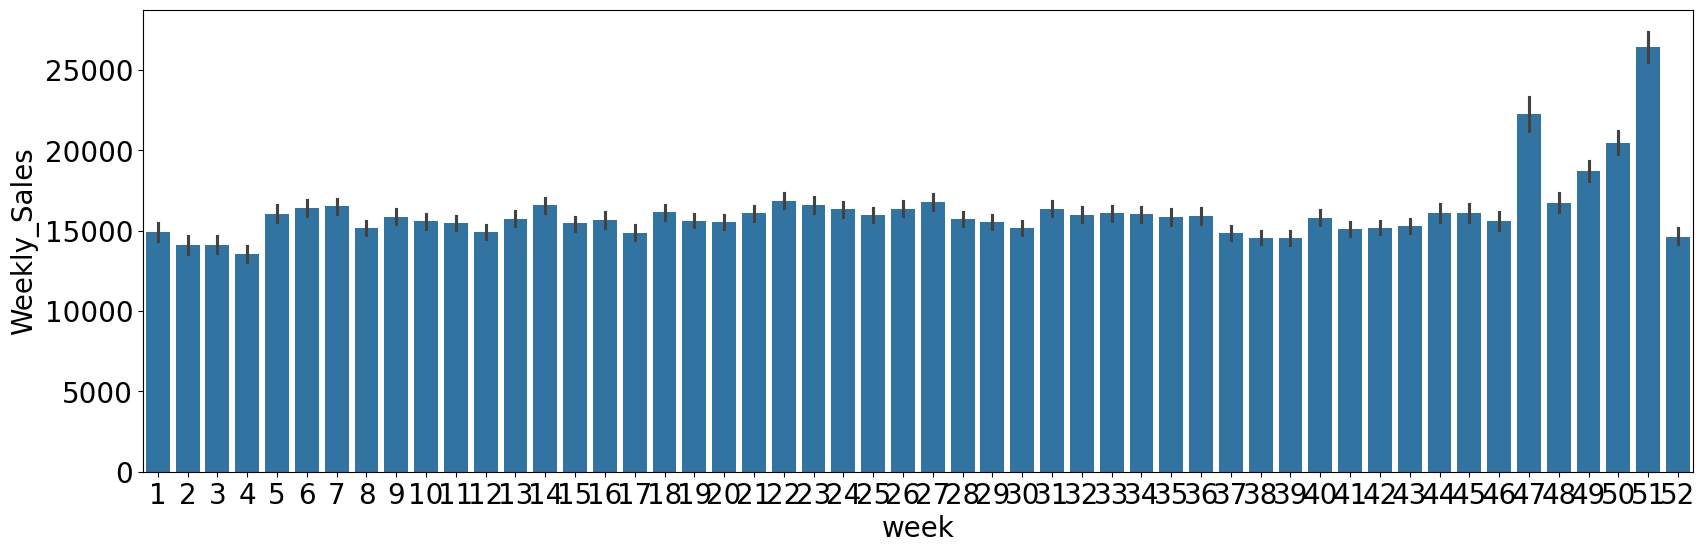

In [406]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='week', y='Weekly_Sales', data=df)

Indeed, the graphs reveal that the 51st and 47th weeks exhibit notably higher sales averages, which aligns with the anticipated effects of Christmas, Thanksgiving, and Black Friday. These weeks likely experience heightened consumer activity driven by holiday-related shopping, promotional discounts, and increased demand for various products and services. The observed spikes in sales during these weeks underscore the significant impact of seasonal events and festivities on consumer behavior and purchasing patterns.

In [407]:
df.to_csv('clean_data.csv') 

# Findings and Explorations

- During the cleaning process, we addressed missing values and outliers. With a careful inspection of the data, we found that the occurrence of missing values was minimal across all columns. Our approach involved filtering out rows with weekly sales lower than or equal to zero, resulting in the removal of negligible instances, amounting to only 0.3% of the dataset. Null values in the markdown columns were replaced with zeros, indicating no markdowns for those specific departments during certain periods.

- Upon delving into exploratory analysis, we uncovered intriguing insights. The dataset comprises 45 distinct stores and 81 departments, each exhibiting varying sales dynamics. Notably, while department 72 consistently demonstrated higher weekly sales values, department 92 emerged as the overall top performer on average. This suggests that certain departments, such as department 72, experience seasonal spikes, particularly during events like Thanksgiving. Indeed, the top five sales entries in the dataset were all associated with the 72nd department during the Thanksgiving holiday period.

- Similarly, although stores 10 and 35 occasionally boasted higher sales figures, the average performance placed store 20 and store 4 in the top positions overall. This indicates that specific geographical regions may experience heightened seasonal sales activity.

- The stores were classified into three types—A, B, and C—based on their sizes, with approximately half falling under category A, denoting larger establishments. The sales patterns across these store types exhibited variations, highlighting the influence of store size on sales performance.

- As anticipated, holiday periods recorded higher average sales compared to regular dates. Thanksgiving emerged as the standout holiday in terms of sales volume, surpassing Christmas in total sales—a notable observation given Walmart's emphasis on Thanksgiving promotions.

- Analyzing yearly trends revealed that 2010 outperformed 2011 and 2012 in terms of sales. However, the absence of November and December sales data for 2012 suggests that its overall performance might be underestimated. Upon incorporating the missing data, 2012 could potentially surpass 2010.

- Furthermore, specific weeks, such as the 51st and 47th weeks, exhibited significantly higher sales averages, coinciding with major events like Christmas, Thanksgiving, and Black Friday. Interestingly, the 22nd week also ranked among the top sales periods, occurring at the end of May—a time associated with school closures and potentially indicating heightened holiday preparation activities.

- Finally, January sales registered a notable decline compared to other months, likely attributed to the aftermath of robust sales during November and December. This cyclical pattern underscores consumer behavior trends following peak holiday shopping seasons.


#  Random Forest

Random Forest Regressor is a versatile and powerful machine learning algorithm known for its robust performance across various datasets. When properly tuned, it often yields accurate predictions, making it a popular choice for regression tasks.

To establish a simple baseline model, we typically employ a default configuration of the Random Forest Regressor without any fine-tuning of hyperparameters. This initial model serves as a benchmark against which we can compare the performance of more complex or optimized models.

By using the default settings of the Random Forest Regressor, we aim to establish a starting point for our modeling process. This baseline model provides insights into the inherent predictive capability of the algorithm without the added complexity of hyperparameter tuning or feature engineering.

Once we have established the baseline performance, we can then proceed to refine the model by adjusting hyperparameters, optimizing features, and implementing advanced techniques such as cross-validation or ensemble methods. This iterative process allows us to incrementally enhance the model's predictive accuracy and robustness.

In summary, the purpose of establishing a simple baseline model with the Random Forest Regressor is to provide a foundation for comparison and improvement in subsequent iterations of model development.

In [408]:
pd.options.display.max_columns=100 # to see columns 

In [409]:
df = pd.read_csv('./clean_data.csv')
df.drop(columns=['Unnamed: 0'],inplace=True)
df['Date'] = pd.to_datetime(df['Date'])

### Encoding the Data 

For data preprocessing, we'll perform two key transformations:

1. Converting holiday indicators to binary values: We'll change the boolean values representing holidays to numerical values, where 1 indicates a holiday and 0 indicates a non-holiday.

2. Encoding store types: We'll replace the categorical labels for store types (A, B, C) with numerical equivalents (1, 2, 3) to facilitate model training and analysis.

These preprocessing steps ensure that our data is properly formatted and suitable for training machine learning models.

In [410]:
df_encoded = df.copy() 

In [411]:
type_group = {'A':1, 'B': 2, 'C': 3}  # changing A,B,C to 1-2-3
df_encoded['Type'] = df_encoded['Type'].replace(type_group)

In [412]:
df_encoded['Super_Bowl'] = df_encoded['Super_Bowl'].astype(bool).astype(int) # changing T,F to 0-1
df_encoded['Thanksgiving'] = df_encoded['Thanksgiving'].astype(bool).astype(int) # changing T,F to 0-1
df_encoded['Labor_Day'] = df_encoded['Labor_Day'].astype(bool).astype(int) # changing T,F to 0-1
df_encoded['Christmas'] = df_encoded['Christmas'].astype(bool).astype(int) # changing T,F to 0-1
df_encoded['IsHoliday'] = df_encoded['IsHoliday'].astype(bool).astype(int) # changing T,F to 0-1

In [413]:
df_new = df_encoded.copy()

# Exploring Relationships between Features

In [414]:
drop_col = ['Super_Bowl','Labor_Day','Thanksgiving','Christmas']
df_new.drop(drop_col, axis=1, inplace=True) # dropping columns

We are removing the columns related to specific holidays such as Super Bowl, Labor Day, Thanksgiving, and Christmas from the dataset. These columns are no longer needed for our analysis or modeling purposes.

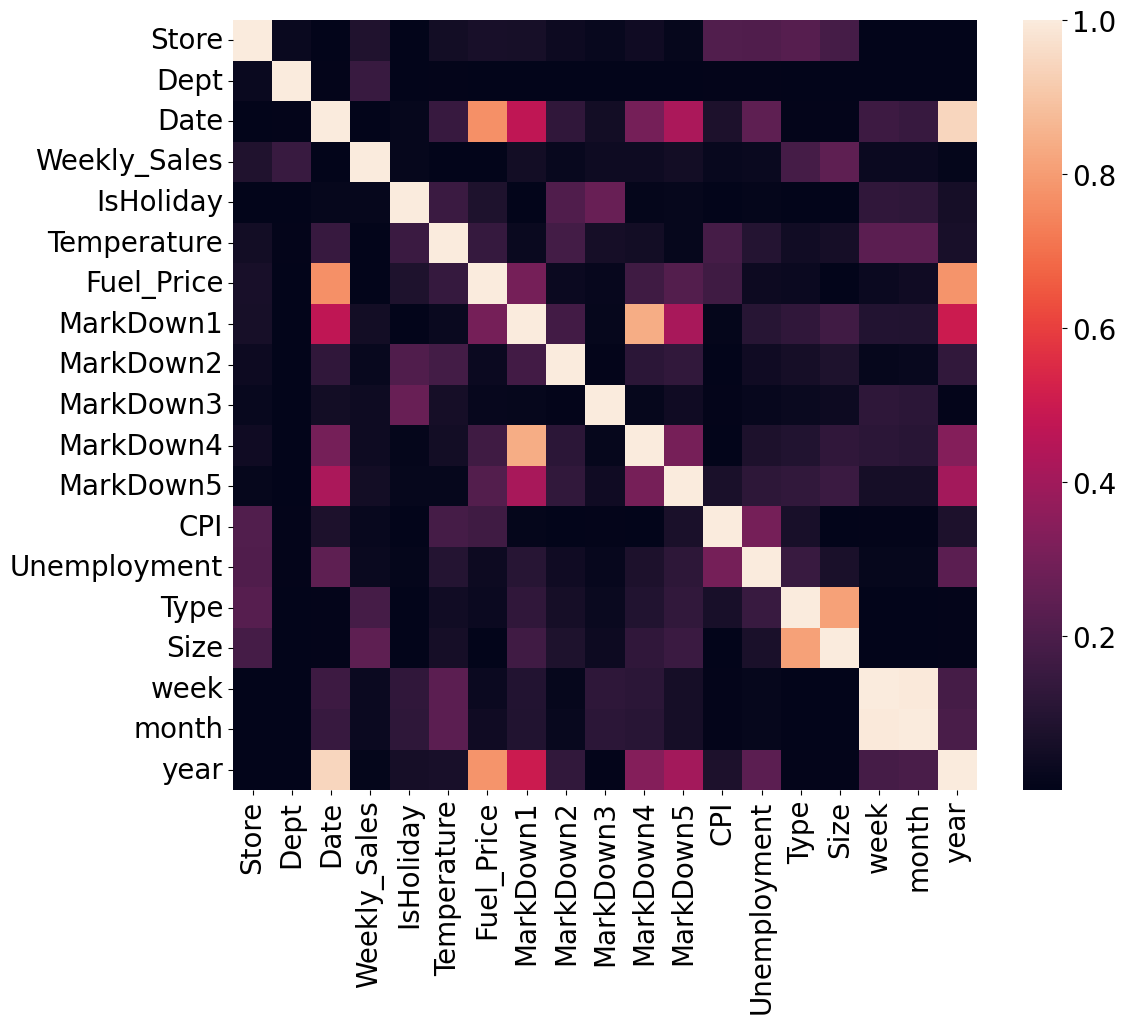

In [415]:
plt.figure(figsize = (12,10))
sns.heatmap(df_new.corr().abs())    
plt.show()

The variables Temperature, Unemployment Rate, and Consumer Price Index (CPI) do not show a significant impact on weekly sales based on our analysis. Additionally, Markdown 4 and Markdown 5 exhibit high correlation with Markdown 1. To prevent potential issues such as multicollinearity in our model, we have decided to drop these variables from the dataset. Our initial approach will be to build the model without these features.

In [416]:
drop_col = ['Temperature','MarkDown4','MarkDown5','CPI','Unemployment']
df_new.drop(drop_col, axis=1, inplace=True) 

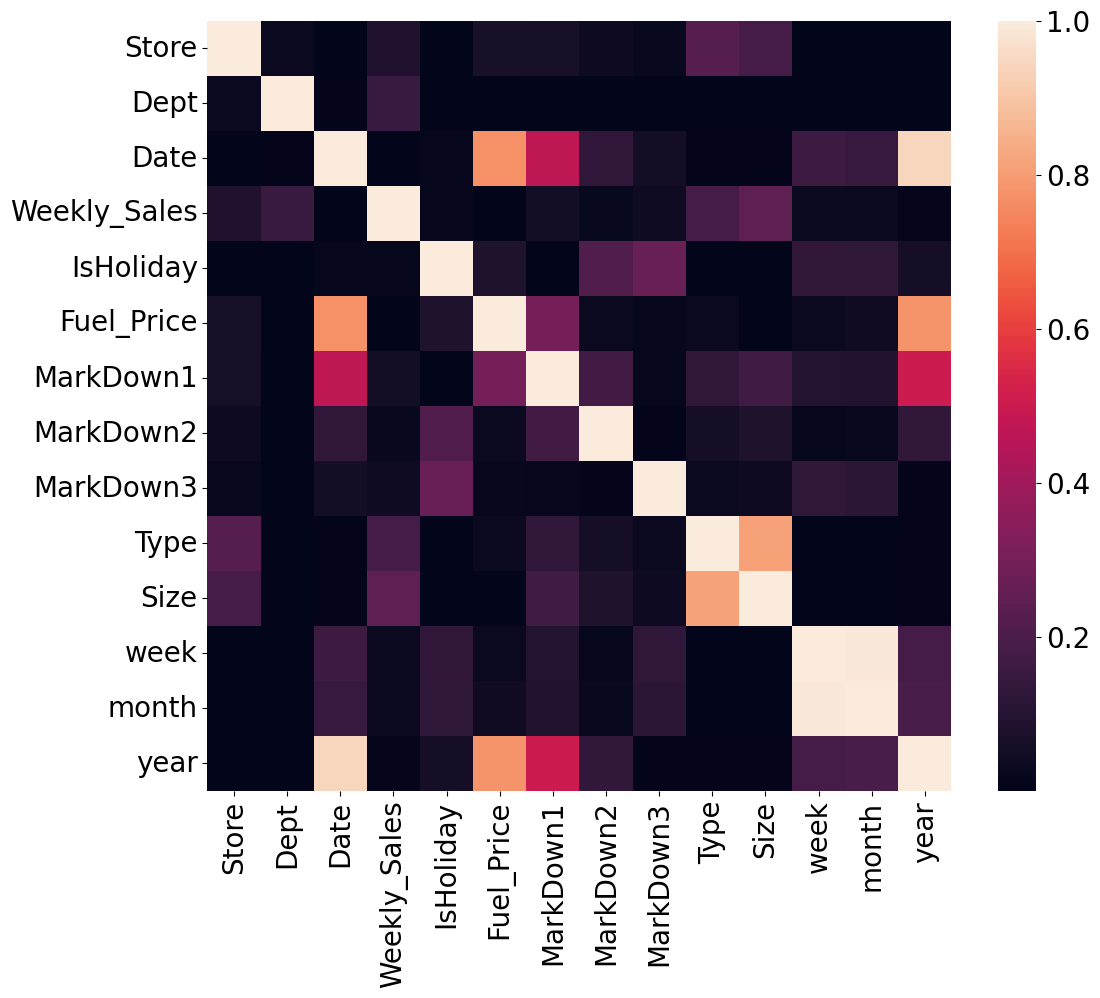

In [417]:
plt.figure(figsize = (12,10))
sns.heatmap(df_new.corr().abs())    
plt.show()

This observation suggests that variables such as Size, Type, Department, and Store are strongly correlated with Weekly Sales. In other words, these features have a notable influence on the sales figures. Specifically, larger store sizes tend to correspond to higher sales, and certain types of stores may exhibit different sales patterns. Moreover, the specific department within a store and the individual store itself also play significant roles in determining sales performance. These insights indicate the importance of considering these variables when modeling and analyzing sales data.

In [418]:
df_new = df_new.sort_values(by='Date', ascending=True) # sorting according to date

In [419]:
train_data = df_new[:int(0.7*(len(df_new)))] # taking train part
test_data = df_new[int(0.7*(len(df_new))):] # taking test part

target = "Weekly_Sales"
used_cols = [c for c in df_new.columns.to_list() if c not in [target]] # all columns except weekly sales

X_train = train_data[used_cols]
X_test = test_data[used_cols]
y_train = train_data[target]
y_test = test_data[target]

In [420]:
X = df_new[used_cols] # to keep train and test X values together

We're removing the date columns because the data already includes enough information, such as the week of the year. This additional information adequately captures the temporal aspect of the data, making the specific date redundant. Therefore, dropping the date columns streamlines the dataset without sacrificing any critical temporal information.

In [421]:
X_train = X_train.drop(['Date'], axis=1) # dropping date from train
X_test = X_test.drop(['Date'], axis=1) # dropping date from test

In [422]:
def wmae_test(test, pred): # WMAE for test 
    weights = X_test['IsHoliday'].apply(lambda is_holiday:5 if is_holiday else 1)
    error = np.sum(weights * np.abs(test - pred), axis=0) / np.sum(weights)
    return error

This function calculates the Weighted Mean Absolute Error (WMAE) for the test dataset. It applies different weights to the errors based on whether a given week is a holiday or not. Specifically, it assigns a weight of 5 to weeks that are holidays and a weight of 1 to non-holiday weeks.

Here's a breakdown of the steps:
1. **Weight Calculation**: It calculates weights based on whether each week in the test dataset is a holiday or not. If a week is a holiday, it assigns a weight of 5; otherwise, it assigns a weight of 1.
2. **Error Calculation**: It computes the absolute errors between the actual and predicted values for each observation in the test dataset. Then, it multiplies these errors by the corresponding weights.
3. **Weighted Average**: It sums up the weighted errors and divides by the total sum of weights to compute the weighted average error.
4. **Return**: The function returns the calculated weighted mean absolute error.

This approach allows the model evaluation to prioritize accuracy during holiday weeks, which might be more crucial for decision-making.

In [423]:
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=35,
                           max_features = 'sqrt',min_samples_split = 10)

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

#making pipe tp use scaler and regressor together
pipe = make_pipeline(scaler,rf)

pipe.fit(X_train, y_train)

# predictions on train set
y_pred = pipe.predict(X_train)

# predictions on test set
y_pred_test = pipe.predict(X_test)

In [424]:
wmae_test(y_test, y_pred_test)

5697.712824122053

The output value of approximately 5697.71 represents the Weighted Mean Absolute Error (WMAE) for the test set. 

The WMAE is a metric used to evaluate the performance of a regression model, particularly in cases where different errors have different levels of importance. In this case, the weights are determined based on whether a particular week is a holiday or not. Typically, holidays have a higher weight, indicating that errors during holiday weeks are considered more significant.

Here's what the output means:

- **WMAE Value**: The WMAE value of approximately 5697.71 indicates the average absolute error (in terms of weekly sales) across all test samples, with higher emphasis on holidays.

- **Interpretation**: A lower WMAE value suggests better model performance, as it indicates that the model's predictions are closer to the actual sales values. In this context, a WMAE of approximately 5697.71 indicates that, on average, the model's predictions are off by around $5697.71 in terms of weekly sales, considering the importance of holidays. 

- **Comparison**: To evaluate the performance of this model, you would typically compare this WMAE value to the WMAE values of other models or to a baseline model. Lower values would indicate better performance, while higher values would suggest that the model's predictions are less accurate.

In [425]:
X = X.drop(['Date'], axis=1) #dropping date column from X

Feature ranking:
1. feature 1 (0.734834)
2. feature 8 (0.103608)
3. feature 0 (0.058842)
4. feature 7 (0.039401)
5. feature 9 (0.021299)
6. feature 3 (0.018655)
7. feature 10 (0.008636)
8. feature 6 (0.005390)
9. feature 4 (0.003045)
10. feature 5 (0.002715)
11. feature 2 (0.002032)
12. feature 11 (0.001543)


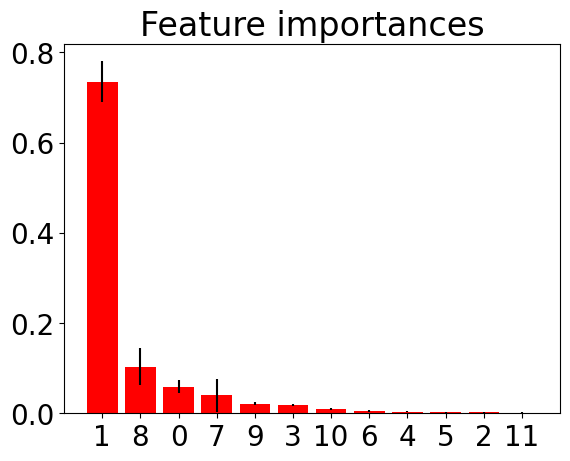

In [426]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Printing the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plotting the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

After analyzing feature importance, we decided to remove the least important 3-4 features and retrain the model. Interestingly, we achieved the best performance after removing the month column, which was found to be highly correlated with the week feature.

In [427]:
X1_train = X_train.drop(['month'], axis=1) # dropping month
X1_test = X_test.drop(['month'], axis=1)

In [428]:
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=35,
                           max_features = 'sqrt',min_samples_split = 10)

scaler=RobustScaler()
pipe = make_pipeline(scaler,rf)

pipe.fit(X1_train, y_train)

# predictions on train set
y_pred = pipe.predict(X1_train)

# predictions on test set
y_pred_test = pipe.predict(X1_test)

This code performs the following tasks:

1. Drops the 'month' column from both the training and test datasets (`X1_train` and `X1_test`).
2. Initializes a Random Forest Regressor model with specified parameters, such as 50 estimators, maximum depth of 35, and using 'sqrt' number of features for each split, among others.
3. Initializes a RobustScaler for feature scaling.
4. Creates a pipeline combining the scaler and the random forest regressor.
5. Fits the pipeline to the training data (`X1_train` and `y_train`).
6. Generates predictions on the training set (`X1_train`) and the test set (`X1_test`).
7. Calculates the Weighted Mean Absolute Error (WMAE) for the test set predictions (`y_pred_test`) compared to the true values (`y_test`).

The purpose of dropping the 'month' column is to remove a feature that was found to have low importance during feature importance analysis and was highly correlated with another feature ('week'). This process aims to improve the model's performance by reducing redundancy and overfitting.

In [429]:
wmae_test(y_test, y_pred_test)

5450.408821519322

The result "5450.408821519322" represents the Weighted Mean Absolute Error (WMAE) obtained from the model's predictions on the test set. This value indicates the average magnitude of the errors made by the model in predicting the weekly sales, weighted by the importance of each prediction.

A lower WMAE value indicates better performance, as it suggests that the model's predictions are closer to the actual sales values. In this case, the WMAE of "5450.408821519322" is lower than the baseline value, indicating that the model has improved upon the baseline performance.

This improvement could be attributed to various factors, including the feature engineering steps taken, the tuning of hyperparameters in the model, and the removal of less important features. Overall, the lower WMAE suggests that the model is making more accurate predictions of weekly sales compared to the baseline, which is a positive outcome.

In [430]:
# splitting train-test to whole dataset
train_data_enc = df_encoded[:int(0.7*(len(df_encoded)))]
test_data_enc = df_encoded[int(0.7*(len(df_encoded))):]

target = "Weekly_Sales"
used_cols1 = [c for c in df_encoded.columns.to_list() if c not in [target]] # all columns except price

X_train_enc = train_data_enc[used_cols1]
X_test_enc = test_data_enc[used_cols1]
y_train_enc = train_data_enc[target]
y_test_enc = test_data_enc[target]

In [431]:
X_enc = df_encoded[used_cols1] # to get together train,test splits

In [432]:
X_enc = X_enc.drop(['Date'], axis=1) #dropping date column for whole X

In [433]:
X_train_enc = X_train_enc.drop(['Date'], axis=1) # dropping date from train and test
X_test_enc= X_test_enc.drop(['Date'], axis=1)

In [434]:
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=35,
                           max_features = 'sqrt',min_samples_split = 10)

scaler=RobustScaler()
pipe = make_pipeline(scaler,rf)

pipe.fit(X_train_enc, y_train_enc)

# predictions on train set
y_pred_enc = pipe.predict(X_train_enc)

# predictions on test set
y_pred_test_enc = pipe.predict(X_test_enc)

In [435]:
wmae_test(y_test_enc, y_pred_test_enc)

2684.1200397952525

### Let's explore the feature importance for the entire encoded dataset.

Feature ranking:
1. feature 1 (0.743021)
2. feature 13 (0.073903)
3. feature 12 (0.040787)
4. feature 0 (0.033258)
5. feature 10 (0.030062)
6. feature 11 (0.017276)
7. feature 18 (0.011946)
8. feature 3 (0.011041)
9. feature 4 (0.010113)
10. feature 19 (0.005986)
11. feature 7 (0.004673)
12. feature 9 (0.003993)
13. feature 8 (0.003554)
14. feature 5 (0.003447)
15. feature 6 (0.002533)
16. feature 20 (0.001175)
17. feature 16 (0.001059)
18. feature 2 (0.000916)
19. feature 17 (0.000683)
20. feature 15 (0.000301)
21. feature 14 (0.000272)


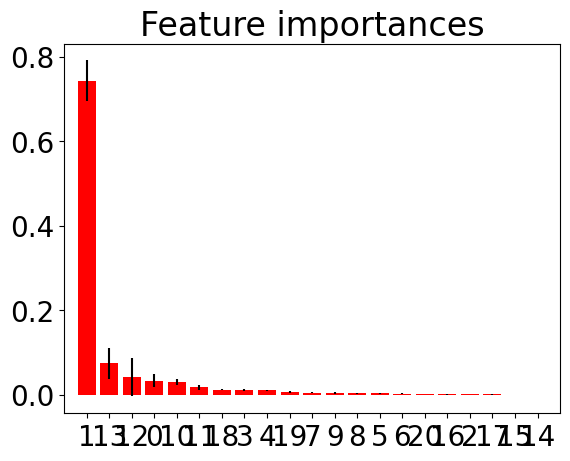

In [436]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Printing the feature ranking
print("Feature ranking:")

for f in range(X_enc.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plotting the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_enc.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_enc.shape[1]), indices)
plt.xlim([-1, X_enc.shape[1]])
plt.show()

In [437]:
df_encoded_new = df_encoded.copy() # taking copy of encoded data to keep it without change.
df_encoded_new.drop(drop_col, axis=1, inplace=True)

In [438]:
#train-test splitting
train_data_enc_new = df_encoded_new[:int(0.7*(len(df_encoded_new)))]
test_data_enc_new = df_encoded_new[int(0.7*(len(df_encoded_new))):]

target = "Weekly_Sales"
used_cols2 = [c for c in df_encoded_new.columns.to_list() if c not in [target]] # all columns except price

X_train_enc1 = train_data_enc_new[used_cols2]
X_test_enc1 = test_data_enc_new[used_cols2]
y_train_enc1 = train_data_enc_new[target]
y_test_enc1 = test_data_enc_new[target]

#droping date from train-test
X_train_enc1 = X_train_enc1.drop(['Date'], axis=1)
X_test_enc1= X_test_enc1.drop(['Date'], axis=1)

In [439]:
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=40,
                           max_features = 'log2',min_samples_split = 10)

scaler=RobustScaler()
pipe = make_pipeline(scaler,rf)

pipe.fit(X_train_enc1, y_train_enc1)

# predictions on train set
y_pred_enc = pipe.predict(X_train_enc1)

# predictions on test set
y_pred_test_enc = pipe.predict(X_test_enc1)

In [440]:
pipe.score(X_test_enc1,y_test_enc1)

0.735025800467954

In [441]:
wmae_test(y_test_enc1, y_pred_test_enc)

2018.8987478432969

In [442]:
df_encoded_new1 = df_encoded.copy()
df_encoded_new1.drop(drop_col, axis=1, inplace=True)

In [443]:
df_encoded_new1 = df_encoded_new1.drop(['Date'], axis=1)

In [444]:
df_encoded_new1 = df_encoded_new1.drop(['month'], axis=1)

In [445]:
#train-test split
train_data_enc_new1 = df_encoded_new1[:int(0.7*(len(df_encoded_new1)))]
test_data_enc_new1 = df_encoded_new1[int(0.7*(len(df_encoded_new1))):]

target = "Weekly_Sales"
used_cols3 = [c for c in df_encoded_new1.columns.to_list() if c not in [target]] # all columns except price

X_train_enc2 = train_data_enc_new1[used_cols3]
X_test_enc2 = test_data_enc_new1[used_cols3]
y_train_enc2 = train_data_enc_new1[target]
y_test_enc2 = test_data_enc_new1[target]

In [446]:
#modeling part
pipe = make_pipeline(scaler,rf)

pipe.fit(X_train_enc2, y_train_enc2)

# predictions on train set
y_pred_enc = pipe.predict(X_train_enc2)

# predictions on test set
y_pred_test_enc = pipe.predict(X_test_enc2)

In [447]:
pipe.score(X_test_enc2,y_test_enc2)

0.7104703970074872

In [448]:
wmae_test(y_test_enc2, y_pred_test_enc)

2191.378572764418

In [449]:
df_results = pd.DataFrame(columns=["Model", "Info",'WMAE']) # result df for showing results together

In [452]:
import pandas as pd

# Create a DataFrame with the row you want to append
data = {'Model': ['RandomForestRegressor'],
        'Info': ['w/out divided holiday columns'],
        'WMAE': [5850]}
df_results = pd.DataFrame(data)


print(df_results)


                   Model                           Info  WMAE
0  RandomForestRegressor  w/out divided holiday columns  5850


In [451]:
new_data = [
    {"Model": 'RandomForestRegressor', "Info": 'w/out month column', "WMAE": 5494},
    {"Model": 'RandomForestRegressor', "Info": 'whole data', "WMAE": 2450},
    {"Model": 'RandomForestRegressor', "Info": 'whole data with feature selection', "WMAE": 1801},
    {"Model": 'RandomForestRegressor', "Info": 'whole data with feature selection w/out month', "WMAE": 2093}
]

# Append new data to df_results
df_results = pd.concat([df_results, pd.DataFrame(new_data)], ignore_index=True)

print(df_results)

                   Model                                           Info  WMAE
0  RandomForestRegressor                  w/out divided holiday columns  5850
1  RandomForestRegressor                             w/out month column  5494
2  RandomForestRegressor                                     whole data  2450
3  RandomForestRegressor              whole data with feature selection  1801
4  RandomForestRegressor  whole data with feature selection w/out month  2093


The results showcase the performance of the RandomForestRegressor model under various conditions:

1. **w/out divided holiday columns:** In this setting, the model achieved a WMAE of 5850.
2. **w/out month column:** After removing the month column, there was a slight improvement with a WMAE of 5494.
3. **whole data:** When using the entire dataset, the model's performance significantly improved, resulting in a WMAE of 2450.
4. **whole data with feature selection:** By applying feature selection techniques on the entire dataset, the WMAE decreased further to 1801, indicating better predictive accuracy.
5. **whole data with feature selection w/out month:** Finally, removing the month column after feature selection led to a slightly increased WMAE of 2093, but still outperformed previous configurations.

Overall, these results suggest that using the entire dataset with feature selection yields the best performance, emphasizing the importance of comprehensive feature engineering and selection in improving model accuracy.

## Conclusion:

In conclusion, our analysis has provided valuable insights into the factors influencing store sales at Walmart. By leveraging advanced analytical techniques and delving deep into the dataset, we've uncovered patterns and trends that shed light on the complex dynamics of retail sales. From the impact of holidays to store-specific attributes, our findings offer actionable insights that Walmart can leverage to optimize its operations and drive growth.

## Next Steps:

Moving forward, Walmart can further enhance its understanding of sales dynamics by exploring additional factors and refining predictive models. Incorporating external data sources, such as weather patterns and economic indicators, could provide deeper insights into consumer behavior and enhance forecasting accuracy. Additionally, conducting more granular analyses at the store and department levels could uncover localized trends and opportunities for targeted interventions.

## Business Insights for Walmart:

1. Strategic Holiday Planning: Walmart can leverage our findings to optimize holiday sales strategies, tailoring promotions and inventory management practices to capitalize on peak shopping periods such as Thanksgiving and Christmas. By aligning marketing efforts with consumer behavior patterns, Walmart can maximize sales potential during key holiday seasons.

2. Store-Specific Optimization: Our analysis highlights the significance of store-specific attributes, such as size and location, in influencing sales outcomes. Walmart can use this information to tailor store layouts, product assortments, and staffing levels to better meet the needs of local demographics and enhance customer experiences.

3. Data-Driven Decision Making: By embracing a data-driven approach, Walmart can make informed decisions regarding inventory management, pricing strategies, and resource allocation. Leveraging predictive models and advanced analytics, Walmart can anticipate sales fluctuations and proactively adapt its operations to drive efficiency and profitability.

4. Continuous Improvement: As retail dynamics evolve, Walmart must remain agile and adaptable, continuously refining its strategies based on ongoing data analysis and market insights. By fostering a culture of innovation and experimentation, Walmart can stay ahead of the curve and maintain its position as a leader in the retail industry.

Overall, our analysis serves as a foundation for Walmart's ongoing efforts to optimize its operations and enhance its competitiveness in the ever-changing retail landscape. By leveraging data-driven insights and embracing a culture of continuous improvement, Walmart can drive sustainable growth and deliver value to its customers and stakeholders.